In [ ]:
!apt-get -qq install xxd
!pip install pandas numpy matplotlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = "/content/drive/MyDrive/FINAL_merged.csv"
data = pd.read_csv(path)

In [ ]:
data

,"Valence(-5,5)","Arousal (-5,5)",Emotion,HR,GSR
0,-3,2,"Low V, High A: Scared - Distressed",85,0.65
1,-2,-3,"Low V, Low A: Sad - Bored",74,0.65
2,-2,-3,"Low V, Low A: Sad - Bored",74,0.64
3,-4,2,"Low V, High A: Scared - Distressed",93,0.64
4,-3,-2,"Low V, Low A: Sad - Bored",78,0.64
...,...,...,...,...,...
220,2,2,"High V, High A: Happy - Excited",87,0.61
221,3,1,"High V, High A: Happy - Excited",90,0.61
222,2,-2,"High V, Low A: Calm - Relaxed",76,0.60
223,2,-2,"High V, Low A: Calm - Relaxed",80,0.60


In [ ]:
data['Emotion'].value_counts()

High V, High A: Happy - Excited        68
Low V, Low A: Sad - Bored              57
High V, Low A: Calm - Relaxed          53
Low V, High A: Scared - Distressed     47
Name: Emotion, dtype: int64

In [ ]:
Emotion_mapping = {'High V, High A: Happy - Excited ': 0, 'Low V, Low A: Sad - Bored ': 1, 'Low V, High A: Scared - Distressed ': 2, 'High V, Low A: Calm - Relaxed ': 3}

In [ ]:
def preprocess_inputs(df):
  df = df.copy()
    
  df['Emotion'] = df['Emotion'].replace(Emotion_mapping)
    
  y = df['Emotion'].copy()
  X = df.drop(df.columns[[0, 1, 2]], axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

,HR,GSR
41,72,0.68
182,87,0.54
184,93,0.58
132,85,0.61
90,85,0.61
...,...,...
98,84,0.64
220,87,0.61
66,76,0.63
126,90,0.59


In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2, 1)             0         
                                                                 
 gru (GRU)                   (None, 2, 256)            198912    
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 200,964
Trainable params: 200,964
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Build and train a TensorFlow model using the high-level Keras API.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=600, batch_size=1, callbacks=[tf.keras.callbacks.EarlyStopping( monitor='val_loss',patience=5,restore_best_weights=True)])
#history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/600
151/157 [===========================>..] - ETA: 0s - loss: 16.2298 - mae: 2.0715

157/157 [==============================] - 3s 2ms/step - loss: 15.7416 - mae: 2.0499
Epoch 2/600
135/157 [========================>.....] - ETA: 0s - loss: 2.6604 - mae: 1.3377

157/157 [==============================] - 0s 3ms/step - loss: 2.4977 - mae: 1.2815
Epoch 3/600
148/157 [===========================>..] - ETA: 0s - loss: 2.4084 - mae: 1.2684

157/157 [==============================] - 0s 2ms/step - loss: 2.3884 - mae: 1.2653
Epoch 4/600
149/157 [===========================>..] - ETA: 0s - loss: 2.3322 - mae: 1.2314

157/157 [==============================] - 0s 2ms/step - loss: 2.3680 - mae: 1.2442
Epoch 5/600
152/157 [============================>.] - ETA: 0s - loss: 2.3703 - mae: 1.2450

157/157 [==============================] - 0s 2ms/step - loss: 2.4029 - mae: 1.2575
Epoch 6/600
154/157 [============================>.] - ETA: 0s - loss: 2.3408 - mae: 1.2408

157/157 [==============================] - 0s 2ms/step - loss: 2.3812 - mae: 1.2546
Epoch 7/600
149/157 [===========================>..] - ETA: 0s - loss: 2.3433 - mae: 1.2501

157/157 [==============================] - 0s 2ms/step - loss: 2.3687 - mae: 1.2543
Epoch 8/600
150/157 [===========================>..] - ETA: 0s - loss: 2.3319 - mae: 1.2557

157/157 [==============================] - 0s 2ms/step - loss: 2.3783 - mae: 1.2716
Epoch 9/600
155/157 [============================>.] - ETA: 0s - loss: 2.3369 - mae: 1.2529

157/157 [==============================] - 0s 2ms/step - loss: 2.3556 - mae: 1.2589
Epoch 10/600
150/157 [===========================>..] - ETA: 0s - loss: 2.3043 - mae: 1.2241

157/157 [==============================] - 1s 4ms/step - loss: 2.3088 - mae: 1.2276
Epoch 11/600
150/157 [===========================>..] - ETA: 0s - loss: 2.3569 - mae: 1.2532

157/157 [==============================] - 1s 4ms/step - loss: 2.3459 - mae: 1.2489
Epoch 12/600
143/157 [==========================>...] - ETA: 0s - loss: 2.3116 - mae: 1.2480

157/157 [==============================] - 1s 4ms/step - loss: 2.3684 - mae: 1.2658
Epoch 13/600
150/157 [===========================>..] - ETA: 0s - loss: 2.3442 - mae: 1.2358

157/157 [==============================] - 1s 4ms/step - loss: 2.3114 - mae: 1.2262
Epoch 14/600
155/157 [============================>.] - ETA: 0s - loss: 2.2725 - mae: 1.2251

157/157 [==============================] - 1s 4ms/step - loss: 2.3007 - mae: 1.2348
Epoch 15/600
147/157 [===========================>..] - ETA: 0s - loss: 2.3448 - mae: 1.2379

157/157 [==============================] - 1s 3ms/step - loss: 2.3670 - mae: 1.2447
Epoch 16/600
146/157 [==========================>...] - ETA: 0s - loss: 2.3918 - mae: 1.2517

157/157 [==============================] - 1s 3ms/step - loss: 2.3390 - mae: 1.2371
Epoch 17/600
152/157 [============================>.] - ETA: 0s - loss: 2.3689 - mae: 1.2566

157/157 [==============================] - 1s 3ms/step - loss: 2.3518 - mae: 1.2480
Epoch 18/600
155/157 [============================>.] - ETA: 0s - loss: 2.3028 - mae: 1.2332

157/157 [==============================] - 1s 4ms/step - loss: 2.3187 - mae: 1.2370
Epoch 19/600
151/157 [===========================>..] - ETA: 0s - loss: 2.2705 - mae: 1.2251

157/157 [==============================] - 1s 4ms/step - loss: 2.3245 - mae: 1.2428
Epoch 20/600
149/157 [===========================>..] - ETA: 0s - loss: 2.3072 - mae: 1.2245

157/157 [==============================] - 1s 4ms/step - loss: 2.3187 - mae: 1.2284
Epoch 21/600
150/157 [===========================>..] - ETA: 0s - loss: 2.3400 - mae: 1.2624

157/157 [==============================] - 1s 4ms/step - loss: 2.3472 - mae: 1.2611
Epoch 22/600
156/157 [============================>.] - ETA: 0s - loss: 2.2786 - mae: 1.2253

157/157 [==============================] - 0s 3ms/step - loss: 2.2716 - mae: 1.2231
Epoch 23/600
145/157 [==========================>...] - ETA: 0s - loss: 2.3558 - mae: 1.2491

157/157 [==============================] - 1s 4ms/step - loss: 2.3267 - mae: 1.2422
Epoch 24/600
152/157 [============================>.] - ETA: 0s - loss: 2.3423 - mae: 1.2478

157/157 [==============================] - 1s 4ms/step - loss: 2.3218 - mae: 1.2416
Epoch 25/600
157/157 [==============================] - ETA: 0s - loss: 2.3048 - mae: 1.2324

157/157 [==============================] - 1s 4ms/step - loss: 2.3048 - mae: 1.2324
Epoch 26/600
150/157 [===========================>..] - ETA: 0s - loss: 2.3141 - mae: 1.2339

157/157 [==============================] - 1s 4ms/step - loss: 2.3172 - mae: 1.2345
Epoch 27/600
154/157 [============================>.] - ETA: 0s - loss: 2.3221 - mae: 1.2486

157/157 [==============================] - 1s 4ms/step - loss: 2.3155 - mae: 1.2479
Epoch 28/600
156/157 [============================>.] - ETA: 0s - loss: 2.2546 - mae: 1.2217

157/157 [==============================] - 1s 3ms/step - loss: 2.2651 - mae: 1.2253
Epoch 29/600
147/157 [===========================>..] - ETA: 0s - loss: 2.2804 - mae: 1.2330

157/157 [==============================] - 1s 4ms/step - loss: 2.2639 - mae: 1.2272
Epoch 30/600
150/157 [===========================>..] - ETA: 0s - loss: 2.1746 - mae: 1.1957

157/157 [==============================] - 1s 4ms/step - loss: 2.1550 - mae: 1.1907
Epoch 31/600
142/157 [==========================>...] - ETA: 0s - loss: 2.1648 - mae: 1.1954

157/157 [==============================] - 1s 3ms/step - loss: 2.1491 - mae: 1.1881
Epoch 32/600
149/157 [===========================>..] - ETA: 0s - loss: 2.1368 - mae: 1.1792

157/157 [==============================] - 1s 4ms/step - loss: 2.1874 - mae: 1.1983
Epoch 33/600
152/157 [============================>.] - ETA: 0s - loss: 2.1219 - mae: 1.2046

157/157 [==============================] - 1s 4ms/step - loss: 2.1293 - mae: 1.2069
Epoch 34/600
152/157 [============================>.] - ETA: 0s - loss: 2.1385 - mae: 1.2049

157/157 [==============================] - 1s 4ms/step - loss: 2.1197 - mae: 1.1980
Epoch 35/600
151/157 [===========================>..] - ETA: 0s - loss: 2.1208 - mae: 1.1963

157/157 [==============================] - 1s 5ms/step - loss: 2.1031 - mae: 1.1904
Epoch 36/600
148/157 [===========================>..] - ETA: 0s - loss: 2.1295 - mae: 1.2019

157/157 [==============================] - 1s 4ms/step - loss: 2.1678 - mae: 1.2145
Epoch 37/600
154/157 [============================>.] - ETA: 0s - loss: 2.1759 - mae: 1.2230

157/157 [==============================] - 1s 4ms/step - loss: 2.1728 - mae: 1.2221
Epoch 38/600
151/157 [===========================>..] - ETA: 0s - loss: 2.0752 - mae: 1.1744

157/157 [==============================] - 1s 3ms/step - loss: 2.1053 - mae: 1.1866
Epoch 39/600
150/157 [===========================>..] - ETA: 0s - loss: 2.1387 - mae: 1.1998

157/157 [==============================] - 0s 3ms/step - loss: 2.1237 - mae: 1.1926
Epoch 40/600
151/157 [===========================>..] - ETA: 0s - loss: 2.1281 - mae: 1.1913

157/157 [==============================] - 0s 2ms/step - loss: 2.1420 - mae: 1.1971
Epoch 41/600
150/157 [===========================>..] - ETA: 0s - loss: 2.1188 - mae: 1.1871

157/157 [==============================] - 0s 2ms/step - loss: 2.1330 - mae: 1.1911
Epoch 42/600
154/157 [============================>.] - ETA: 0s - loss: 2.1250 - mae: 1.2108

157/157 [==============================] - 0s 2ms/step - loss: 2.1382 - mae: 1.2151
Epoch 43/600
148/157 [===========================>..] - ETA: 0s - loss: 2.0669 - mae: 1.1835

157/157 [==============================] - 0s 2ms/step - loss: 2.0895 - mae: 1.1895
Epoch 44/600
150/157 [===========================>..] - ETA: 0s - loss: 2.1942 - mae: 1.2087

157/157 [==============================] - 0s 2ms/step - loss: 2.1304 - mae: 1.1854
Epoch 45/600
137/157 [=========================>....] - ETA: 0s - loss: 2.2424 - mae: 1.2317

157/157 [==============================] - 0s 2ms/step - loss: 2.1510 - mae: 1.2070
Epoch 46/600
140/157 [=========================>....] - ETA: 0s - loss: 2.1233 - mae: 1.1881

157/157 [==============================] - 0s 2ms/step - loss: 2.0947 - mae: 1.1784
Epoch 47/600
153/157 [============================>.] - ETA: 0s - loss: 2.1360 - mae: 1.2125

157/157 [==============================] - 0s 2ms/step - loss: 2.1592 - mae: 1.2204
Epoch 48/600
148/157 [===========================>..] - ETA: 0s - loss: 2.0521 - mae: 1.1844

157/157 [==============================] - 0s 2ms/step - loss: 2.0962 - mae: 1.1997
Epoch 49/600
151/157 [===========================>..] - ETA: 0s - loss: 2.0722 - mae: 1.1764

157/157 [==============================] - 0s 2ms/step - loss: 2.0998 - mae: 1.1839
Epoch 50/600
153/157 [============================>.] - ETA: 0s - loss: 2.0972 - mae: 1.1853

157/157 [==============================] - 0s 2ms/step - loss: 2.1298 - mae: 1.1973
Epoch 51/600
147/157 [===========================>..] - ETA: 0s - loss: 2.1270 - mae: 1.2113

157/157 [==============================] - 0s 2ms/step - loss: 2.1183 - mae: 1.2092
Epoch 52/600
149/157 [===========================>..] - ETA: 0s - loss: 2.0413 - mae: 1.1575

157/157 [==============================] - 0s 2ms/step - loss: 2.0942 - mae: 1.1784
Epoch 53/600
150/157 [===========================>..] - ETA: 0s - loss: 2.1177 - mae: 1.1969

157/157 [==============================] - 0s 2ms/step - loss: 2.0958 - mae: 1.1904
Epoch 54/600
144/157 [==========================>...] - ETA: 0s - loss: 2.1350 - mae: 1.1867

157/157 [==============================] - 0s 2ms/step - loss: 2.1104 - mae: 1.1754
Epoch 55/600
153/157 [============================>.] - ETA: 0s - loss: 2.0862 - mae: 1.1894

157/157 [==============================] - 0s 2ms/step - loss: 2.0857 - mae: 1.1920
Epoch 56/600
151/157 [===========================>..] - ETA: 0s - loss: 2.0531 - mae: 1.1674

157/157 [==============================] - 0s 2ms/step - loss: 2.0804 - mae: 1.1782
Epoch 57/600
145/157 [==========================>...] - ETA: 0s - loss: 2.1424 - mae: 1.2178

157/157 [==============================] - 0s 2ms/step - loss: 2.1257 - mae: 1.2095
Epoch 58/600
151/157 [===========================>..] - ETA: 0s - loss: 2.0739 - mae: 1.1619

157/157 [==============================] - 0s 2ms/step - loss: 2.0296 - mae: 1.1466
Epoch 59/600
154/157 [============================>.] - ETA: 0s - loss: 2.1157 - mae: 1.2073

157/157 [==============================] - 0s 2ms/step - loss: 2.1092 - mae: 1.2066
Epoch 60/600
154/157 [============================>.] - ETA: 0s - loss: 2.0984 - mae: 1.1912

157/157 [==============================] - 0s 2ms/step - loss: 2.0952 - mae: 1.1899
Epoch 61/600
143/157 [==========================>...] - ETA: 0s - loss: 2.0935 - mae: 1.1866

157/157 [==============================] - 0s 2ms/step - loss: 2.0809 - mae: 1.1813
Epoch 62/600
146/157 [==========================>...] - ETA: 0s - loss: 2.0052 - mae: 1.1687

157/157 [==============================] - 0s 2ms/step - loss: 2.0256 - mae: 1.1788
Epoch 63/600
143/157 [==========================>...] - ETA: 0s - loss: 1.9274 - mae: 1.1492

157/157 [==============================] - 0s 2ms/step - loss: 1.9500 - mae: 1.1531
Epoch 64/600
146/157 [==========================>...] - ETA: 0s - loss: 1.9731 - mae: 1.1651

157/157 [==============================] - 0s 2ms/step - loss: 1.9626 - mae: 1.1629
Epoch 65/600
152/157 [============================>.] - ETA: 0s - loss: 1.9369 - mae: 1.1413

157/157 [==============================] - 0s 2ms/step - loss: 1.9800 - mae: 1.1585
Epoch 66/600
143/157 [==========================>...] - ETA: 0s - loss: 1.9210 - mae: 1.1335

157/157 [==============================] - 0s 2ms/step - loss: 1.8672 - mae: 1.1148
Epoch 67/600
146/157 [==========================>...] - ETA: 0s - loss: 1.9198 - mae: 1.1465

157/157 [==============================] - 0s 2ms/step - loss: 1.9470 - mae: 1.1556
Epoch 68/600
148/157 [===========================>..] - ETA: 0s - loss: 1.9285 - mae: 1.1469

157/157 [==============================] - 0s 2ms/step - loss: 1.9273 - mae: 1.1478
Epoch 69/600
143/157 [==========================>...] - ETA: 0s - loss: 1.9648 - mae: 1.1613

157/157 [==============================] - 0s 2ms/step - loss: 1.9540 - mae: 1.1545
Epoch 70/600
148/157 [===========================>..] - ETA: 0s - loss: 1.9183 - mae: 1.1589

157/157 [==============================] - 0s 2ms/step - loss: 1.8580 - mae: 1.1364
Epoch 71/600
146/157 [==========================>...] - ETA: 0s - loss: 1.7763 - mae: 1.1321

157/157 [==============================] - 0s 2ms/step - loss: 1.7875 - mae: 1.1371
Epoch 72/600
137/157 [=========================>....] - ETA: 0s - loss: 1.8034 - mae: 1.1146

157/157 [==============================] - 0s 2ms/step - loss: 1.7795 - mae: 1.1066
Epoch 73/600
143/157 [==========================>...] - ETA: 0s - loss: 1.7677 - mae: 1.1143

157/157 [==============================] - 0s 2ms/step - loss: 1.8194 - mae: 1.1340
Epoch 74/600
148/157 [===========================>..] - ETA: 0s - loss: 1.7842 - mae: 1.1257

157/157 [==============================] - 0s 2ms/step - loss: 1.7626 - mae: 1.1142
Epoch 75/600
143/157 [==========================>...] - ETA: 0s - loss: 1.7380 - mae: 1.0729

157/157 [==============================] - 0s 2ms/step - loss: 1.7384 - mae: 1.0798
Epoch 76/600
146/157 [==========================>...] - ETA: 0s - loss: 1.7772 - mae: 1.1334

157/157 [==============================] - 0s 2ms/step - loss: 1.7941 - mae: 1.1370
Epoch 77/600
149/157 [===========================>..] - ETA: 0s - loss: 1.7376 - mae: 1.0946

157/157 [==============================] - 0s 2ms/step - loss: 1.7568 - mae: 1.1032
Epoch 78/600
141/157 [=========================>....] - ETA: 0s - loss: 1.7812 - mae: 1.1149

157/157 [==============================] - 0s 2ms/step - loss: 1.7867 - mae: 1.1198
Epoch 79/600
154/157 [============================>.] - ETA: 0s - loss: 1.7851 - mae: 1.1254

157/157 [==============================] - 0s 2ms/step - loss: 1.7784 - mae: 1.1231
Epoch 80/600
149/157 [===========================>..] - ETA: 0s - loss: 1.7585 - mae: 1.0978

157/157 [==============================] - 0s 2ms/step - loss: 1.7687 - mae: 1.1043
Epoch 81/600
140/157 [=========================>....] - ETA: 0s - loss: 1.8000 - mae: 1.1160

157/157 [==============================] - 0s 2ms/step - loss: 1.7423 - mae: 1.0913
Epoch 82/600
143/157 [==========================>...] - ETA: 0s - loss: 1.7780 - mae: 1.1281

157/157 [==============================] - 0s 2ms/step - loss: 1.8050 - mae: 1.1399
Epoch 83/600
147/157 [===========================>..] - ETA: 0s - loss: 1.7872 - mae: 1.1117

157/157 [==============================] - 0s 2ms/step - loss: 1.7512 - mae: 1.0962
Epoch 84/600
152/157 [============================>.] - ETA: 0s - loss: 1.7751 - mae: 1.1065

157/157 [==============================] - 0s 2ms/step - loss: 1.7671 - mae: 1.1047
Epoch 85/600
148/157 [===========================>..] - ETA: 0s - loss: 1.7196 - mae: 1.0910

157/157 [==============================] - 0s 2ms/step - loss: 1.7161 - mae: 1.0903
Epoch 86/600
142/157 [==========================>...] - ETA: 0s - loss: 1.7301 - mae: 1.1011

157/157 [==============================] - 0s 2ms/step - loss: 1.7041 - mae: 1.0859
Epoch 87/600
145/157 [==========================>...] - ETA: 0s - loss: 1.7582 - mae: 1.0956

157/157 [==============================] - 0s 2ms/step - loss: 1.7579 - mae: 1.1018
Epoch 88/600
145/157 [==========================>...] - ETA: 0s - loss: 1.7718 - mae: 1.1110

157/157 [==============================] - 0s 2ms/step - loss: 1.7520 - mae: 1.1035
Epoch 89/600
140/157 [=========================>....] - ETA: 0s - loss: 1.7632 - mae: 1.1245

157/157 [==============================] - 0s 2ms/step - loss: 1.7469 - mae: 1.1182
Epoch 90/600
144/157 [==========================>...] - ETA: 0s - loss: 1.7353 - mae: 1.1136

157/157 [==============================] - 0s 2ms/step - loss: 1.7195 - mae: 1.1036
Epoch 91/600
150/157 [===========================>..] - ETA: 0s - loss: 1.7180 - mae: 1.0972

157/157 [==============================] - 0s 2ms/step - loss: 1.7355 - mae: 1.1049
Epoch 92/600
143/157 [==========================>...] - ETA: 0s - loss: 1.6997 - mae: 1.0946

157/157 [==============================] - 0s 2ms/step - loss: 1.7258 - mae: 1.1071
Epoch 93/600
145/157 [==========================>...] - ETA: 0s - loss: 1.7919 - mae: 1.1349

157/157 [==============================] - 0s 2ms/step - loss: 1.7434 - mae: 1.1119
Epoch 94/600
150/157 [===========================>..] - ETA: 0s - loss: 1.7150 - mae: 1.0885

157/157 [==============================] - 0s 2ms/step - loss: 1.7126 - mae: 1.0891
Epoch 95/600
145/157 [==========================>...] - ETA: 0s - loss: 1.7638 - mae: 1.1181

157/157 [==============================] - 0s 2ms/step - loss: 1.7323 - mae: 1.1081
Epoch 96/600
154/157 [============================>.] - ETA: 0s - loss: 1.7476 - mae: 1.1076

157/157 [==============================] - 0s 2ms/step - loss: 1.7408 - mae: 1.1042
Epoch 97/600
149/157 [===========================>..] - ETA: 0s - loss: 1.7489 - mae: 1.1074

157/157 [==============================] - 0s 2ms/step - loss: 1.7326 - mae: 1.1020
Epoch 98/600
133/157 [========================>.....] - ETA: 0s - loss: 1.7283 - mae: 1.1110

157/157 [==============================] - 0s 2ms/step - loss: 1.7027 - mae: 1.1020
Epoch 99/600
151/157 [===========================>..] - ETA: 0s - loss: 1.6533 - mae: 1.0793

157/157 [==============================] - 0s 2ms/step - loss: 1.6810 - mae: 1.0919
Epoch 100/600
151/157 [===========================>..] - ETA: 0s - loss: 1.7128 - mae: 1.1127

157/157 [==============================] - 0s 2ms/step - loss: 1.7155 - mae: 1.1146
Epoch 101/600
157/157 [==============================] - ETA: 0s - loss: 1.6683 - mae: 1.0750

157/157 [==============================] - 0s 2ms/step - loss: 1.6683 - mae: 1.0750
Epoch 102/600
148/157 [===========================>..] - ETA: 0s - loss: 1.6814 - mae: 1.0846

157/157 [==============================] - 0s 2ms/step - loss: 1.6735 - mae: 1.0782
Epoch 103/600
155/157 [============================>.] - ETA: 0s - loss: 1.6781 - mae: 1.0999

157/157 [==============================] - 0s 2ms/step - loss: 1.7070 - mae: 1.1104
Epoch 104/600
155/157 [============================>.] - ETA: 0s - loss: 1.7165 - mae: 1.1188

157/157 [==============================] - 1s 4ms/step - loss: 1.7021 - mae: 1.1130
Epoch 105/600
152/157 [============================>.] - ETA: 0s - loss: 1.6980 - mae: 1.1006

157/157 [==============================] - 0s 2ms/step - loss: 1.6857 - mae: 1.0989
Epoch 106/600
139/157 [=========================>....] - ETA: 0s - loss: 1.6320 - mae: 1.0665

157/157 [==============================] - 0s 2ms/step - loss: 1.6724 - mae: 1.0836
Epoch 107/600
149/157 [===========================>..] - ETA: 0s - loss: 1.6185 - mae: 1.0528

157/157 [==============================] - 0s 2ms/step - loss: 1.6258 - mae: 1.0555
Epoch 108/600
143/157 [==========================>...] - ETA: 0s - loss: 1.7102 - mae: 1.1105

157/157 [==============================] - 1s 4ms/step - loss: 1.7003 - mae: 1.1060
Epoch 109/600
156/157 [============================>.] - ETA: 0s - loss: 1.6864 - mae: 1.0911

157/157 [==============================] - 0s 3ms/step - loss: 1.6798 - mae: 1.0880
Epoch 110/600
152/157 [============================>.] - ETA: 0s - loss: 1.6240 - mae: 1.0805

157/157 [==============================] - 1s 4ms/step - loss: 1.6018 - mae: 1.0726
Epoch 111/600
154/157 [============================>.] - ETA: 0s - loss: 1.5029 - mae: 1.0411

157/157 [==============================] - 1s 3ms/step - loss: 1.5133 - mae: 1.0458
Epoch 112/600
153/157 [============================>.] - ETA: 0s - loss: 1.4970 - mae: 1.0309

157/157 [==============================] - 1s 4ms/step - loss: 1.5203 - mae: 1.0416
Epoch 113/600
147/157 [===========================>..] - ETA: 0s - loss: 1.5336 - mae: 1.0429

157/157 [==============================] - 1s 4ms/step - loss: 1.5218 - mae: 1.0434
Epoch 114/600
144/157 [==========================>...] - ETA: 0s - loss: 1.5650 - mae: 1.0762

157/157 [==============================] - 1s 4ms/step - loss: 1.5367 - mae: 1.0662
Epoch 115/600
143/157 [==========================>...] - ETA: 0s - loss: 1.5195 - mae: 1.0807

157/157 [==============================] - 1s 4ms/step - loss: 1.5475 - mae: 1.0845
Epoch 116/600
152/157 [============================>.] - ETA: 0s - loss: 1.5100 - mae: 1.0510

157/157 [==============================] - 1s 4ms/step - loss: 1.5185 - mae: 1.0542
Epoch 117/600
154/157 [============================>.] - ETA: 0s - loss: 1.4027 - mae: 0.9979

157/157 [==============================] - 1s 4ms/step - loss: 1.4243 - mae: 1.0081
Epoch 118/600
153/157 [============================>.] - ETA: 0s - loss: 1.5068 - mae: 1.0638

157/157 [==============================] - 1s 4ms/step - loss: 1.5085 - mae: 1.0606
Epoch 119/600
146/157 [==========================>...] - ETA: 0s - loss: 1.5182 - mae: 1.0609

157/157 [==============================] - 1s 3ms/step - loss: 1.5192 - mae: 1.0614
Epoch 120/600
151/157 [===========================>..] - ETA: 0s - loss: 1.4846 - mae: 1.0382

157/157 [==============================] - 1s 4ms/step - loss: 1.4726 - mae: 1.0326
Epoch 121/600
150/157 [===========================>..] - ETA: 0s - loss: 1.4916 - mae: 1.0437

157/157 [==============================] - 1s 4ms/step - loss: 1.5116 - mae: 1.0536
Epoch 122/600
148/157 [===========================>..] - ETA: 0s - loss: 1.4806 - mae: 1.0480

157/157 [==============================] - 0s 3ms/step - loss: 1.5120 - mae: 1.0634
Epoch 123/600
149/157 [===========================>..] - ETA: 0s - loss: 1.4214 - mae: 1.0052

157/157 [==============================] - 0s 2ms/step - loss: 1.4267 - mae: 1.0102
Epoch 124/600
143/157 [==========================>...] - ETA: 0s - loss: 1.5142 - mae: 1.0718

157/157 [==============================] - 0s 2ms/step - loss: 1.5018 - mae: 1.0637
Epoch 125/600
147/157 [===========================>..] - ETA: 0s - loss: 1.4626 - mae: 1.0322

157/157 [==============================] - 0s 2ms/step - loss: 1.4487 - mae: 1.0258
Epoch 126/600
144/157 [==========================>...] - ETA: 0s - loss: 1.4661 - mae: 1.0389

157/157 [==============================] - 0s 2ms/step - loss: 1.4937 - mae: 1.0480
Epoch 127/600
143/157 [==========================>...] - ETA: 0s - loss: 1.5056 - mae: 1.0632

157/157 [==============================] - 0s 2ms/step - loss: 1.4927 - mae: 1.0545
Epoch 128/600
141/157 [=========================>....] - ETA: 0s - loss: 1.4735 - mae: 1.0433

157/157 [==============================] - 0s 2ms/step - loss: 1.4766 - mae: 1.0453
Epoch 129/600
153/157 [============================>.] - ETA: 0s - loss: 1.4617 - mae: 1.0250

157/157 [==============================] - 0s 2ms/step - loss: 1.4514 - mae: 1.0195
Epoch 130/600
152/157 [============================>.] - ETA: 0s - loss: 1.4624 - mae: 1.0553

157/157 [==============================] - 0s 2ms/step - loss: 1.5044 - mae: 1.0727
Epoch 131/600
132/157 [========================>.....] - ETA: 0s - loss: 1.5237 - mae: 1.0661

157/157 [==============================] - 0s 2ms/step - loss: 1.4527 - mae: 1.0342
Epoch 132/600
151/157 [===========================>..] - ETA: 0s - loss: 1.4587 - mae: 1.0315

157/157 [==============================] - 0s 2ms/step - loss: 1.4527 - mae: 1.0326
Epoch 133/600
147/157 [===========================>..] - ETA: 0s - loss: 1.4383 - mae: 1.0474

157/157 [==============================] - 0s 2ms/step - loss: 1.4597 - mae: 1.0565
Epoch 134/600
146/157 [==========================>...] - ETA: 0s - loss: 1.4454 - mae: 1.0204

157/157 [==============================] - 0s 2ms/step - loss: 1.4389 - mae: 1.0171
Epoch 135/600
147/157 [===========================>..] - ETA: 0s - loss: 1.3797 - mae: 1.0025

157/157 [==============================] - 0s 2ms/step - loss: 1.3745 - mae: 0.9987
Epoch 136/600
135/157 [========================>.....] - ETA: 0s - loss: 1.4338 - mae: 1.0279

157/157 [==============================] - 0s 2ms/step - loss: 1.4473 - mae: 1.0384
Epoch 137/600
138/157 [=========================>....] - ETA: 0s - loss: 1.4679 - mae: 1.0613

157/157 [==============================] - 0s 2ms/step - loss: 1.4708 - mae: 1.0585
Epoch 138/600
145/157 [==========================>...] - ETA: 0s - loss: 1.5029 - mae: 1.0712

157/157 [==============================] - 0s 2ms/step - loss: 1.4631 - mae: 1.0571
Epoch 139/600
148/157 [===========================>..] - ETA: 0s - loss: 1.4945 - mae: 1.0694

157/157 [==============================] - 0s 2ms/step - loss: 1.4958 - mae: 1.0668
Epoch 140/600
151/157 [===========================>..] - ETA: 0s - loss: 1.4451 - mae: 1.0476

157/157 [==============================] - 0s 2ms/step - loss: 1.4360 - mae: 1.0415
Epoch 141/600
142/157 [==========================>...] - ETA: 0s - loss: 1.4390 - mae: 1.0464

157/157 [==============================] - 0s 3ms/step - loss: 1.4251 - mae: 1.0321
Epoch 142/600
152/157 [============================>.] - ETA: 0s - loss: 1.4217 - mae: 1.0202

157/157 [==============================] - 1s 5ms/step - loss: 1.4281 - mae: 1.0245
Epoch 143/600
150/157 [===========================>..] - ETA: 0s - loss: 1.4244 - mae: 1.0284

157/157 [==============================] - 1s 4ms/step - loss: 1.4268 - mae: 1.0258
Epoch 144/600
148/157 [===========================>..] - ETA: 0s - loss: 1.3164 - mae: 0.9805

157/157 [==============================] - 1s 4ms/step - loss: 1.3519 - mae: 0.9943
Epoch 145/600
148/157 [===========================>..] - ETA: 0s - loss: 1.4645 - mae: 1.0509

157/157 [==============================] - 1s 5ms/step - loss: 1.4060 - mae: 1.0216
Epoch 146/600
156/157 [============================>.] - ETA: 0s - loss: 1.4194 - mae: 1.0237

157/157 [==============================] - 1s 4ms/step - loss: 1.4124 - mae: 1.0194
Epoch 147/600
143/157 [==========================>...] - ETA: 0s - loss: 1.3638 - mae: 0.9881

157/157 [==============================] - 1s 4ms/step - loss: 1.3484 - mae: 0.9840
Epoch 148/600
156/157 [============================>.] - ETA: 0s - loss: 1.4580 - mae: 1.0424

157/157 [==============================] - 1s 3ms/step - loss: 1.4622 - mae: 1.0446
Epoch 149/600
155/157 [============================>.] - ETA: 0s - loss: 1.4016 - mae: 1.0075

157/157 [==============================] - 1s 4ms/step - loss: 1.4030 - mae: 1.0088
Epoch 150/600
155/157 [============================>.] - ETA: 0s - loss: 1.4184 - mae: 1.0312

157/157 [==============================] - 1s 3ms/step - loss: 1.4194 - mae: 1.0296
Epoch 151/600
149/157 [===========================>..] - ETA: 0s - loss: 1.3572 - mae: 0.9883

157/157 [==============================] - 1s 4ms/step - loss: 1.3726 - mae: 0.9933
Epoch 152/600
144/157 [==========================>...] - ETA: 0s - loss: 1.4106 - mae: 1.0254

157/157 [==============================] - 0s 2ms/step - loss: 1.4210 - mae: 1.0341
Epoch 153/600
153/157 [============================>.] - ETA: 0s - loss: 1.3665 - mae: 1.0047

157/157 [==============================] - 0s 2ms/step - loss: 1.3812 - mae: 1.0103
Epoch 154/600
147/157 [===========================>..] - ETA: 0s - loss: 1.3283 - mae: 0.9809

157/157 [==============================] - 0s 2ms/step - loss: 1.3428 - mae: 0.9894
Epoch 155/600
145/157 [==========================>...] - ETA: 0s - loss: 1.3886 - mae: 1.0168

157/157 [==============================] - 0s 2ms/step - loss: 1.3800 - mae: 1.0147
Epoch 156/600
142/157 [==========================>...] - ETA: 0s - loss: 1.3219 - mae: 0.9799

157/157 [==============================] - 0s 2ms/step - loss: 1.3309 - mae: 0.9865
Epoch 157/600
143/157 [==========================>...] - ETA: 0s - loss: 1.4255 - mae: 1.0453

157/157 [==============================] - 0s 2ms/step - loss: 1.4365 - mae: 1.0509
Epoch 158/600
144/157 [==========================>...] - ETA: 0s - loss: 1.4054 - mae: 1.0281

157/157 [==============================] - 0s 2ms/step - loss: 1.4084 - mae: 1.0224
Epoch 159/600
137/157 [=========================>....] - ETA: 0s - loss: 1.3895 - mae: 1.0310

157/157 [==============================] - 0s 2ms/step - loss: 1.3769 - mae: 1.0203
Epoch 160/600
146/157 [==========================>...] - ETA: 0s - loss: 1.4248 - mae: 1.0370

157/157 [==============================] - 0s 2ms/step - loss: 1.4274 - mae: 1.0416
Epoch 161/600
142/157 [==========================>...] - ETA: 0s - loss: 1.3741 - mae: 1.0003

157/157 [==============================] - 0s 2ms/step - loss: 1.4315 - mae: 1.0280
Epoch 162/600
144/157 [==========================>...] - ETA: 0s - loss: 1.4019 - mae: 1.0067

157/157 [==============================] - 0s 2ms/step - loss: 1.3584 - mae: 0.9886
Epoch 163/600
144/157 [==========================>...] - ETA: 0s - loss: 1.4235 - mae: 1.0408

157/157 [==============================] - 0s 2ms/step - loss: 1.3752 - mae: 1.0246
Epoch 164/600
143/157 [==========================>...] - ETA: 0s - loss: 1.3940 - mae: 1.0043

157/157 [==============================] - 0s 2ms/step - loss: 1.4110 - mae: 1.0144
Epoch 165/600
151/157 [===========================>..] - ETA: 0s - loss: 1.3283 - mae: 0.9812

157/157 [==============================] - 0s 2ms/step - loss: 1.3662 - mae: 0.9955
Epoch 166/600
139/157 [=========================>....] - ETA: 0s - loss: 1.4021 - mae: 1.0124

157/157 [==============================] - 0s 2ms/step - loss: 1.3972 - mae: 1.0117
Epoch 167/600
139/157 [=========================>....] - ETA: 0s - loss: 1.3687 - mae: 1.0140

157/157 [==============================] - 0s 2ms/step - loss: 1.3943 - mae: 1.0259
Epoch 168/600
137/157 [=========================>....] - ETA: 0s - loss: 1.3972 - mae: 1.0073

157/157 [==============================] - 0s 2ms/step - loss: 1.3833 - mae: 1.0040
Epoch 169/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2935 - mae: 0.9697

157/157 [==============================] - 0s 2ms/step - loss: 1.3069 - mae: 0.9763
Epoch 170/600
146/157 [==========================>...] - ETA: 0s - loss: 1.3943 - mae: 1.0214

157/157 [==============================] - 0s 2ms/step - loss: 1.3847 - mae: 1.0146
Epoch 171/600
147/157 [===========================>..] - ETA: 0s - loss: 1.4110 - mae: 1.0350

157/157 [==============================] - 0s 2ms/step - loss: 1.4170 - mae: 1.0375
Epoch 172/600
141/157 [=========================>....] - ETA: 0s - loss: 1.3500 - mae: 0.9874

157/157 [==============================] - 0s 2ms/step - loss: 1.3604 - mae: 0.9994
Epoch 173/600
144/157 [==========================>...] - ETA: 0s - loss: 1.4058 - mae: 1.0301

157/157 [==============================] - 0s 2ms/step - loss: 1.3920 - mae: 1.0273
Epoch 174/600
147/157 [===========================>..] - ETA: 0s - loss: 1.3363 - mae: 1.0020

157/157 [==============================] - 0s 2ms/step - loss: 1.3185 - mae: 0.9928
Epoch 175/600
157/157 [==============================] - ETA: 0s - loss: 1.3909 - mae: 1.0166

157/157 [==============================] - 0s 2ms/step - loss: 1.3909 - mae: 1.0166
Epoch 176/600
143/157 [==========================>...] - ETA: 0s - loss: 1.4263 - mae: 1.0399

157/157 [==============================] - 0s 2ms/step - loss: 1.4137 - mae: 1.0373
Epoch 177/600
146/157 [==========================>...] - ETA: 0s - loss: 1.4163 - mae: 1.0409

157/157 [==============================] - 0s 2ms/step - loss: 1.3993 - mae: 1.0282
Epoch 178/600
143/157 [==========================>...] - ETA: 0s - loss: 1.3641 - mae: 1.0084

157/157 [==============================] - 0s 2ms/step - loss: 1.3666 - mae: 1.0097
Epoch 179/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3601 - mae: 1.0109

157/157 [==============================] - 0s 2ms/step - loss: 1.3689 - mae: 1.0152
Epoch 180/600
157/157 [==============================] - ETA: 0s - loss: 1.3439 - mae: 0.9823

157/157 [==============================] - 1s 3ms/step - loss: 1.3439 - mae: 0.9823
Epoch 181/600
144/157 [==========================>...] - ETA: 0s - loss: 1.3791 - mae: 1.0159

157/157 [==============================] - 1s 4ms/step - loss: 1.3720 - mae: 1.0133
Epoch 182/600
154/157 [============================>.] - ETA: 0s - loss: 1.3654 - mae: 0.9961

157/157 [==============================] - 1s 4ms/step - loss: 1.3480 - mae: 0.9888
Epoch 183/600
151/157 [===========================>..] - ETA: 0s - loss: 1.3643 - mae: 1.0098

157/157 [==============================] - 0s 3ms/step - loss: 1.3593 - mae: 1.0015
Epoch 184/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3741 - mae: 1.0087

157/157 [==============================] - 1s 4ms/step - loss: 1.3275 - mae: 0.9843
Epoch 185/600
144/157 [==========================>...] - ETA: 0s - loss: 1.3507 - mae: 1.0095

157/157 [==============================] - 0s 2ms/step - loss: 1.3541 - mae: 1.0157
Epoch 186/600
137/157 [=========================>....] - ETA: 0s - loss: 1.3644 - mae: 1.0010

157/157 [==============================] - 0s 2ms/step - loss: 1.3386 - mae: 0.9909
Epoch 187/600
137/157 [=========================>....] - ETA: 0s - loss: 1.3671 - mae: 0.9988

157/157 [==============================] - 0s 2ms/step - loss: 1.3521 - mae: 0.9933
Epoch 188/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3512 - mae: 1.0032

157/157 [==============================] - 0s 2ms/step - loss: 1.3587 - mae: 1.0071
Epoch 189/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2943 - mae: 0.9720

157/157 [==============================] - 0s 2ms/step - loss: 1.3062 - mae: 0.9764
Epoch 190/600
147/157 [===========================>..] - ETA: 0s - loss: 1.2991 - mae: 0.9617

157/157 [==============================] - 0s 2ms/step - loss: 1.2890 - mae: 0.9552
Epoch 191/600
147/157 [===========================>..] - ETA: 0s - loss: 1.3550 - mae: 1.0184

157/157 [==============================] - 0s 2ms/step - loss: 1.3285 - mae: 1.0078
Epoch 192/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3613 - mae: 0.9992

157/157 [==============================] - 0s 2ms/step - loss: 1.3609 - mae: 0.9929
Epoch 193/600
142/157 [==========================>...] - ETA: 0s - loss: 1.3259 - mae: 1.0046

157/157 [==============================] - 0s 2ms/step - loss: 1.3587 - mae: 1.0180
Epoch 194/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2506 - mae: 0.9433

157/157 [==============================] - 0s 2ms/step - loss: 1.2666 - mae: 0.9497
Epoch 195/600
143/157 [==========================>...] - ETA: 0s - loss: 1.3018 - mae: 0.9628

157/157 [==============================] - 0s 2ms/step - loss: 1.3109 - mae: 0.9620
Epoch 196/600
154/157 [============================>.] - ETA: 0s - loss: 1.2999 - mae: 0.9699

157/157 [==============================] - 0s 2ms/step - loss: 1.3060 - mae: 0.9740
Epoch 197/600
148/157 [===========================>..] - ETA: 0s - loss: 1.3496 - mae: 1.0160

157/157 [==============================] - 0s 2ms/step - loss: 1.3631 - mae: 1.0200
Epoch 198/600
135/157 [========================>.....] - ETA: 0s - loss: 1.3725 - mae: 1.0384

157/157 [==============================] - 0s 2ms/step - loss: 1.3762 - mae: 1.0407
Epoch 199/600
148/157 [===========================>..] - ETA: 0s - loss: 1.3753 - mae: 1.0248

157/157 [==============================] - 0s 2ms/step - loss: 1.3715 - mae: 1.0240
Epoch 200/600
144/157 [==========================>...] - ETA: 0s - loss: 1.3926 - mae: 1.0307

157/157 [==============================] - 0s 2ms/step - loss: 1.3609 - mae: 1.0159
Epoch 201/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3564 - mae: 1.0140

157/157 [==============================] - 0s 2ms/step - loss: 1.3418 - mae: 1.0100
Epoch 202/600
144/157 [==========================>...] - ETA: 0s - loss: 1.3373 - mae: 0.9877

157/157 [==============================] - 0s 2ms/step - loss: 1.3386 - mae: 0.9949
Epoch 203/600
156/157 [============================>.] - ETA: 0s - loss: 1.3294 - mae: 0.9941

157/157 [==============================] - 0s 2ms/step - loss: 1.3434 - mae: 0.9996
Epoch 204/600
140/157 [=========================>....] - ETA: 0s - loss: 1.2695 - mae: 0.9564

157/157 [==============================] - 0s 2ms/step - loss: 1.2740 - mae: 0.9649
Epoch 205/600
141/157 [=========================>....] - ETA: 0s - loss: 1.3026 - mae: 1.0038

157/157 [==============================] - 0s 2ms/step - loss: 1.3112 - mae: 1.0084
Epoch 206/600
135/157 [========================>.....] - ETA: 0s - loss: 1.3198 - mae: 0.9845

157/157 [==============================] - 0s 2ms/step - loss: 1.3230 - mae: 0.9889
Epoch 207/600
140/157 [=========================>....] - ETA: 0s - loss: 1.2948 - mae: 0.9763

157/157 [==============================] - 0s 2ms/step - loss: 1.3296 - mae: 0.9924
Epoch 208/600
147/157 [===========================>..] - ETA: 0s - loss: 1.3446 - mae: 1.0126

157/157 [==============================] - 0s 2ms/step - loss: 1.3578 - mae: 1.0085
Epoch 209/600
136/157 [========================>.....] - ETA: 0s - loss: 1.3746 - mae: 1.0308

157/157 [==============================] - 0s 2ms/step - loss: 1.3424 - mae: 1.0113
Epoch 210/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2928 - mae: 0.9651

157/157 [==============================] - 0s 2ms/step - loss: 1.2868 - mae: 0.9651
Epoch 211/600
136/157 [========================>.....] - ETA: 0s - loss: 1.3616 - mae: 1.0018

157/157 [==============================] - 0s 2ms/step - loss: 1.3363 - mae: 0.9908
Epoch 212/600
157/157 [==============================] - ETA: 0s - loss: 1.3276 - mae: 0.9795

157/157 [==============================] - 0s 2ms/step - loss: 1.3276 - mae: 0.9795
Epoch 213/600
144/157 [==========================>...] - ETA: 0s - loss: 1.3061 - mae: 0.9771

157/157 [==============================] - 0s 2ms/step - loss: 1.3220 - mae: 0.9872
Epoch 214/600
139/157 [=========================>....] - ETA: 0s - loss: 1.3188 - mae: 1.0096

157/157 [==============================] - 0s 2ms/step - loss: 1.3537 - mae: 1.0197
Epoch 215/600
134/157 [========================>.....] - ETA: 0s - loss: 1.3312 - mae: 1.0086

157/157 [==============================] - 0s 2ms/step - loss: 1.3289 - mae: 1.0111
Epoch 216/600
141/157 [=========================>....] - ETA: 0s - loss: 1.3245 - mae: 0.9970

157/157 [==============================] - 0s 2ms/step - loss: 1.3625 - mae: 1.0104
Epoch 217/600
149/157 [===========================>..] - ETA: 0s - loss: 1.3644 - mae: 1.0127

157/157 [==============================] - 0s 2ms/step - loss: 1.3421 - mae: 1.0032
Epoch 218/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3198 - mae: 0.9796

157/157 [==============================] - 0s 2ms/step - loss: 1.2989 - mae: 0.9700
Epoch 219/600
136/157 [========================>.....] - ETA: 0s - loss: 1.2976 - mae: 0.9693

157/157 [==============================] - 0s 2ms/step - loss: 1.3173 - mae: 0.9700
Epoch 220/600
145/157 [==========================>...] - ETA: 0s - loss: 1.2636 - mae: 0.9468

157/157 [==============================] - 0s 2ms/step - loss: 1.2830 - mae: 0.9559
Epoch 221/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3060 - mae: 0.9789

157/157 [==============================] - 0s 2ms/step - loss: 1.3223 - mae: 0.9913
Epoch 222/600
141/157 [=========================>....] - ETA: 0s - loss: 1.3192 - mae: 0.9893

157/157 [==============================] - 0s 2ms/step - loss: 1.2717 - mae: 0.9695
Epoch 223/600
144/157 [==========================>...] - ETA: 0s - loss: 1.3248 - mae: 0.9977

157/157 [==============================] - 0s 2ms/step - loss: 1.2967 - mae: 0.9882
Epoch 224/600
144/157 [==========================>...] - ETA: 0s - loss: 1.2848 - mae: 0.9723

157/157 [==============================] - 0s 2ms/step - loss: 1.3045 - mae: 0.9798
Epoch 225/600
136/157 [========================>.....] - ETA: 0s - loss: 1.3386 - mae: 0.9813

157/157 [==============================] - 0s 2ms/step - loss: 1.3157 - mae: 0.9647
Epoch 226/600
142/157 [==========================>...] - ETA: 0s - loss: 1.2664 - mae: 0.9661

157/157 [==============================] - 0s 2ms/step - loss: 1.2934 - mae: 0.9789
Epoch 227/600
143/157 [==========================>...] - ETA: 0s - loss: 1.3024 - mae: 0.9818

157/157 [==============================] - 0s 2ms/step - loss: 1.3158 - mae: 0.9905
Epoch 228/600
140/157 [=========================>....] - ETA: 0s - loss: 1.2793 - mae: 0.9747

157/157 [==============================] - 0s 2ms/step - loss: 1.2777 - mae: 0.9733
Epoch 229/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3190 - mae: 0.9704

157/157 [==============================] - 0s 2ms/step - loss: 1.3209 - mae: 0.9766
Epoch 230/600
148/157 [===========================>..] - ETA: 0s - loss: 1.2790 - mae: 0.9526

157/157 [==============================] - 0s 2ms/step - loss: 1.2681 - mae: 0.9481
Epoch 231/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2844 - mae: 0.9671

157/157 [==============================] - 0s 2ms/step - loss: 1.2868 - mae: 0.9711
Epoch 232/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3189 - mae: 0.9810

157/157 [==============================] - 0s 2ms/step - loss: 1.3136 - mae: 0.9840
Epoch 233/600
148/157 [===========================>..] - ETA: 0s - loss: 1.2414 - mae: 0.9458

157/157 [==============================] - 0s 2ms/step - loss: 1.2756 - mae: 0.9594
Epoch 234/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2769 - mae: 0.9455

157/157 [==============================] - 0s 2ms/step - loss: 1.2771 - mae: 0.9508
Epoch 235/600
147/157 [===========================>..] - ETA: 0s - loss: 1.3005 - mae: 0.9772

157/157 [==============================] - 0s 2ms/step - loss: 1.2851 - mae: 0.9701
Epoch 236/600
144/157 [==========================>...] - ETA: 0s - loss: 1.3538 - mae: 1.0156

157/157 [==============================] - 0s 2ms/step - loss: 1.3651 - mae: 1.0231
Epoch 237/600
138/157 [=========================>....] - ETA: 0s - loss: 1.2976 - mae: 0.9565

157/157 [==============================] - 0s 2ms/step - loss: 1.3065 - mae: 0.9675
Epoch 238/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2464 - mae: 0.9369

157/157 [==============================] - 0s 2ms/step - loss: 1.2477 - mae: 0.9420
Epoch 239/600
143/157 [==========================>...] - ETA: 0s - loss: 1.3255 - mae: 0.9882

157/157 [==============================] - 0s 2ms/step - loss: 1.3405 - mae: 0.9988
Epoch 240/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3305 - mae: 1.0017

157/157 [==============================] - 0s 2ms/step - loss: 1.3398 - mae: 1.0097
Epoch 241/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2422 - mae: 0.9615

157/157 [==============================] - 0s 2ms/step - loss: 1.2605 - mae: 0.9673
Epoch 242/600
146/157 [==========================>...] - ETA: 0s - loss: 1.2877 - mae: 0.9751

157/157 [==============================] - 0s 2ms/step - loss: 1.2982 - mae: 0.9835
Epoch 243/600
155/157 [============================>.] - ETA: 0s - loss: 1.2883 - mae: 0.9774

157/157 [==============================] - 0s 2ms/step - loss: 1.2941 - mae: 0.9793
Epoch 244/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3612 - mae: 1.0107

157/157 [==============================] - 0s 2ms/step - loss: 1.3772 - mae: 1.0214
Epoch 245/600
139/157 [=========================>....] - ETA: 0s - loss: 1.3148 - mae: 0.9968

157/157 [==============================] - 0s 2ms/step - loss: 1.3082 - mae: 0.9911
Epoch 246/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3095 - mae: 0.9832

157/157 [==============================] - 0s 2ms/step - loss: 1.2765 - mae: 0.9602
Epoch 247/600
137/157 [=========================>....] - ETA: 0s - loss: 1.3281 - mae: 1.0041

157/157 [==============================] - 0s 2ms/step - loss: 1.3285 - mae: 0.9972
Epoch 248/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2393 - mae: 0.9488

157/157 [==============================] - 0s 2ms/step - loss: 1.2632 - mae: 0.9611
Epoch 249/600
155/157 [============================>.] - ETA: 0s - loss: 1.2299 - mae: 0.9411

157/157 [==============================] - 0s 2ms/step - loss: 1.2492 - mae: 0.9497
Epoch 250/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3182 - mae: 0.9992

157/157 [==============================] - 0s 2ms/step - loss: 1.3089 - mae: 0.9921
Epoch 251/600
141/157 [=========================>....] - ETA: 0s - loss: 1.3336 - mae: 0.9960

157/157 [==============================] - 0s 2ms/step - loss: 1.2748 - mae: 0.9626
Epoch 252/600
156/157 [============================>.] - ETA: 0s - loss: 1.3125 - mae: 0.9766

157/157 [==============================] - 0s 2ms/step - loss: 1.3131 - mae: 0.9778
Epoch 253/600
139/157 [=========================>....] - ETA: 0s - loss: 1.2815 - mae: 0.9693

157/157 [==============================] - 0s 2ms/step - loss: 1.2768 - mae: 0.9732
Epoch 254/600
142/157 [==========================>...] - ETA: 0s - loss: 1.2808 - mae: 0.9523

157/157 [==============================] - 0s 2ms/step - loss: 1.3041 - mae: 0.9623
Epoch 255/600
144/157 [==========================>...] - ETA: 0s - loss: 1.2908 - mae: 0.9648

157/157 [==============================] - 0s 2ms/step - loss: 1.3035 - mae: 0.9697
Epoch 256/600
145/157 [==========================>...] - ETA: 0s - loss: 1.3148 - mae: 0.9920

157/157 [==============================] - 0s 2ms/step - loss: 1.2944 - mae: 0.9786
Epoch 257/600
140/157 [=========================>....] - ETA: 0s - loss: 1.2682 - mae: 0.9453

157/157 [==============================] - 0s 2ms/step - loss: 1.2716 - mae: 0.9488
Epoch 258/600
142/157 [==========================>...] - ETA: 0s - loss: 1.3601 - mae: 1.0136

157/157 [==============================] - 0s 2ms/step - loss: 1.3304 - mae: 0.9986
Epoch 259/600
137/157 [=========================>....] - ETA: 0s - loss: 1.2913 - mae: 0.9826

157/157 [==============================] - 0s 2ms/step - loss: 1.2986 - mae: 0.9850
Epoch 260/600
136/157 [========================>.....] - ETA: 0s - loss: 1.2743 - mae: 0.9703

157/157 [==============================] - 0s 2ms/step - loss: 1.2935 - mae: 0.9813
Epoch 261/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2504 - mae: 0.9293

157/157 [==============================] - 0s 2ms/step - loss: 1.2800 - mae: 0.9483
Epoch 262/600
153/157 [============================>.] - ETA: 0s - loss: 1.3334 - mae: 1.0070

157/157 [==============================] - 0s 2ms/step - loss: 1.3217 - mae: 1.0026
Epoch 263/600
137/157 [=========================>....] - ETA: 0s - loss: 1.3453 - mae: 1.0083

157/157 [==============================] - 0s 2ms/step - loss: 1.3123 - mae: 0.9968
Epoch 264/600
146/157 [==========================>...] - ETA: 0s - loss: 1.3171 - mae: 0.9871

157/157 [==============================] - 0s 2ms/step - loss: 1.2951 - mae: 0.9736
Epoch 265/600
139/157 [=========================>....] - ETA: 0s - loss: 1.2879 - mae: 0.9588

157/157 [==============================] - 0s 2ms/step - loss: 1.2863 - mae: 0.9464
Epoch 266/600
135/157 [========================>.....] - ETA: 0s - loss: 1.3222 - mae: 0.9879

157/157 [==============================] - 0s 2ms/step - loss: 1.2950 - mae: 0.9790
Epoch 267/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3007 - mae: 0.9912

157/157 [==============================] - 0s 2ms/step - loss: 1.2866 - mae: 0.9830
Epoch 268/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3329 - mae: 1.0116

157/157 [==============================] - 0s 2ms/step - loss: 1.3272 - mae: 1.0047
Epoch 269/600
139/157 [=========================>....] - ETA: 0s - loss: 1.3269 - mae: 1.0042

157/157 [==============================] - 0s 2ms/step - loss: 1.3280 - mae: 1.0010
Epoch 270/600
142/157 [==========================>...] - ETA: 0s - loss: 1.2633 - mae: 0.9536

157/157 [==============================] - 0s 2ms/step - loss: 1.2325 - mae: 0.9388
Epoch 271/600
157/157 [==============================] - ETA: 0s - loss: 1.2720 - mae: 0.9597

157/157 [==============================] - 0s 2ms/step - loss: 1.2720 - mae: 0.9597
Epoch 272/600
141/157 [=========================>....] - ETA: 0s - loss: 1.3083 - mae: 0.9531

157/157 [==============================] - 0s 2ms/step - loss: 1.3074 - mae: 0.9581
Epoch 273/600
142/157 [==========================>...] - ETA: 0s - loss: 1.2214 - mae: 0.9394

157/157 [==============================] - 0s 2ms/step - loss: 1.2168 - mae: 0.9355
Epoch 274/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2344 - mae: 0.9330

157/157 [==============================] - 0s 2ms/step - loss: 1.2319 - mae: 0.9377
Epoch 275/600
139/157 [=========================>....] - ETA: 0s - loss: 1.3103 - mae: 0.9939

157/157 [==============================] - 0s 2ms/step - loss: 1.3151 - mae: 0.9976
Epoch 276/600
155/157 [============================>.] - ETA: 0s - loss: 1.2528 - mae: 0.9623

157/157 [==============================] - 0s 2ms/step - loss: 1.2451 - mae: 0.9597
Epoch 277/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2831 - mae: 0.9584

157/157 [==============================] - 0s 2ms/step - loss: 1.2549 - mae: 0.9517
Epoch 278/600
137/157 [=========================>....] - ETA: 0s - loss: 1.3258 - mae: 0.9959

157/157 [==============================] - 0s 2ms/step - loss: 1.3009 - mae: 0.9793
Epoch 279/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2996 - mae: 0.9720

157/157 [==============================] - 0s 2ms/step - loss: 1.3125 - mae: 0.9841
Epoch 280/600
157/157 [==============================] - ETA: 0s - loss: 1.2709 - mae: 0.9666

157/157 [==============================] - 0s 2ms/step - loss: 1.2709 - mae: 0.9666
Epoch 281/600
136/157 [========================>.....] - ETA: 0s - loss: 1.3116 - mae: 0.9951

157/157 [==============================] - 0s 2ms/step - loss: 1.2943 - mae: 0.9956
Epoch 282/600
138/157 [=========================>....] - ETA: 0s - loss: 1.2725 - mae: 0.9518

157/157 [==============================] - 0s 2ms/step - loss: 1.3025 - mae: 0.9650
Epoch 283/600
134/157 [========================>.....] - ETA: 0s - loss: 1.1968 - mae: 0.9083

157/157 [==============================] - 0s 2ms/step - loss: 1.2203 - mae: 0.9264
Epoch 284/600
149/157 [===========================>..] - ETA: 0s - loss: 1.2966 - mae: 0.9618

157/157 [==============================] - 1s 4ms/step - loss: 1.2871 - mae: 0.9587
Epoch 285/600
137/157 [=========================>....] - ETA: 0s - loss: 1.2600 - mae: 0.9498

157/157 [==============================] - 1s 3ms/step - loss: 1.2854 - mae: 0.9573
Epoch 286/600
147/157 [===========================>..] - ETA: 0s - loss: 1.3632 - mae: 1.0161

157/157 [==============================] - 0s 3ms/step - loss: 1.3330 - mae: 1.0037
Epoch 287/600
156/157 [============================>.] - ETA: 0s - loss: 1.2850 - mae: 0.9694

157/157 [==============================] - 1s 4ms/step - loss: 1.2837 - mae: 0.9696
Epoch 288/600
139/157 [=========================>....] - ETA: 0s - loss: 1.3397 - mae: 0.9991

157/157 [==============================] - 0s 2ms/step - loss: 1.3187 - mae: 0.9880
Epoch 289/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2670 - mae: 0.9629

157/157 [==============================] - 1s 5ms/step - loss: 1.2765 - mae: 0.9661
Epoch 290/600
137/157 [=========================>....] - ETA: 0s - loss: 1.1944 - mae: 0.9344

157/157 [==============================] - 0s 2ms/step - loss: 1.2099 - mae: 0.9470
Epoch 291/600
136/157 [========================>.....] - ETA: 0s - loss: 1.3216 - mae: 0.9928

157/157 [==============================] - 0s 2ms/step - loss: 1.3258 - mae: 0.9896
Epoch 292/600
151/157 [===========================>..] - ETA: 0s - loss: 1.2729 - mae: 0.9769

157/157 [==============================] - 0s 2ms/step - loss: 1.2821 - mae: 0.9783
Epoch 293/600
155/157 [============================>.] - ETA: 0s - loss: 1.2791 - mae: 0.9678

157/157 [==============================] - 1s 3ms/step - loss: 1.2707 - mae: 0.9644
Epoch 294/600
155/157 [============================>.] - ETA: 0s - loss: 1.2541 - mae: 0.9436

157/157 [==============================] - 1s 4ms/step - loss: 1.2489 - mae: 0.9415
Epoch 295/600
155/157 [============================>.] - ETA: 0s - loss: 1.2144 - mae: 0.9101

157/157 [==============================] - 0s 2ms/step - loss: 1.2188 - mae: 0.9142
Epoch 296/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3463 - mae: 0.9933

157/157 [==============================] - 0s 2ms/step - loss: 1.3305 - mae: 0.9856
Epoch 297/600
134/157 [========================>.....] - ETA: 0s - loss: 1.3187 - mae: 0.9907

157/157 [==============================] - 0s 2ms/step - loss: 1.2919 - mae: 0.9824
Epoch 298/600
156/157 [============================>.] - ETA: 0s - loss: 1.2967 - mae: 0.9816

157/157 [==============================] - 0s 2ms/step - loss: 1.2952 - mae: 0.9819
Epoch 299/600
152/157 [============================>.] - ETA: 0s - loss: 1.2999 - mae: 0.9822

157/157 [==============================] - 0s 2ms/step - loss: 1.3035 - mae: 0.9845
Epoch 300/600
139/157 [=========================>....] - ETA: 0s - loss: 1.2885 - mae: 0.9748

157/157 [==============================] - 0s 2ms/step - loss: 1.2555 - mae: 0.9606
Epoch 301/600
156/157 [============================>.] - ETA: 0s - loss: 1.3427 - mae: 1.0150

157/157 [==============================] - 0s 2ms/step - loss: 1.3383 - mae: 1.0137
Epoch 302/600
136/157 [========================>.....] - ETA: 0s - loss: 1.3116 - mae: 0.9940

157/157 [==============================] - 0s 2ms/step - loss: 1.3106 - mae: 0.9873
Epoch 303/600
138/157 [=========================>....] - ETA: 0s - loss: 1.2891 - mae: 0.9734

157/157 [==============================] - 0s 2ms/step - loss: 1.2386 - mae: 0.9399
Epoch 304/600
137/157 [=========================>....] - ETA: 0s - loss: 1.2481 - mae: 0.9637

157/157 [==============================] - 0s 2ms/step - loss: 1.2515 - mae: 0.9646
Epoch 305/600
138/157 [=========================>....] - ETA: 0s - loss: 1.2934 - mae: 0.9914

157/157 [==============================] - 0s 2ms/step - loss: 1.3056 - mae: 0.9961
Epoch 306/600
153/157 [============================>.] - ETA: 0s - loss: 1.3189 - mae: 0.9910

157/157 [==============================] - 0s 2ms/step - loss: 1.3073 - mae: 0.9859
Epoch 307/600
142/157 [==========================>...] - ETA: 0s - loss: 1.2795 - mae: 0.9683

157/157 [==============================] - 0s 2ms/step - loss: 1.3028 - mae: 0.9780
Epoch 308/600
148/157 [===========================>..] - ETA: 0s - loss: 1.2509 - mae: 0.9313

157/157 [==============================] - 0s 2ms/step - loss: 1.2704 - mae: 0.9418
Epoch 309/600
135/157 [========================>.....] - ETA: 0s - loss: 1.3037 - mae: 0.9946

157/157 [==============================] - 0s 2ms/step - loss: 1.3070 - mae: 0.9967
Epoch 310/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2709 - mae: 0.9720

157/157 [==============================] - 0s 2ms/step - loss: 1.3026 - mae: 0.9850
Epoch 311/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3637 - mae: 0.9986

157/157 [==============================] - 0s 2ms/step - loss: 1.2912 - mae: 0.9591
Epoch 312/600
136/157 [========================>.....] - ETA: 0s - loss: 1.3476 - mae: 0.9993

157/157 [==============================] - 0s 2ms/step - loss: 1.3082 - mae: 0.9801
Epoch 313/600
142/157 [==========================>...] - ETA: 0s - loss: 1.3217 - mae: 0.9936

157/157 [==============================] - 0s 2ms/step - loss: 1.3094 - mae: 0.9906
Epoch 314/600
142/157 [==========================>...] - ETA: 0s - loss: 1.2153 - mae: 0.9339

157/157 [==============================] - 0s 2ms/step - loss: 1.2608 - mae: 0.9602
Epoch 315/600
141/157 [=========================>....] - ETA: 0s - loss: 1.3047 - mae: 0.9866

157/157 [==============================] - 0s 2ms/step - loss: 1.3073 - mae: 0.9888
Epoch 316/600
153/157 [============================>.] - ETA: 0s - loss: 1.2531 - mae: 0.9508

157/157 [==============================] - 0s 2ms/step - loss: 1.2401 - mae: 0.9477
Epoch 317/600
151/157 [===========================>..] - ETA: 0s - loss: 1.2864 - mae: 0.9758

157/157 [==============================] - 0s 2ms/step - loss: 1.2684 - mae: 0.9668
Epoch 318/600
134/157 [========================>.....] - ETA: 0s - loss: 1.3305 - mae: 0.9813

157/157 [==============================] - 0s 2ms/step - loss: 1.3049 - mae: 0.9727
Epoch 319/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2887 - mae: 0.9788

157/157 [==============================] - 0s 2ms/step - loss: 1.2732 - mae: 0.9682
Epoch 320/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2898 - mae: 0.9771

157/157 [==============================] - 0s 2ms/step - loss: 1.2905 - mae: 0.9766
Epoch 321/600
138/157 [=========================>....] - ETA: 0s - loss: 1.2859 - mae: 0.9566

157/157 [==============================] - 0s 2ms/step - loss: 1.2837 - mae: 0.9648
Epoch 322/600
138/157 [=========================>....] - ETA: 0s - loss: 1.2028 - mae: 0.9070

157/157 [==============================] - 0s 2ms/step - loss: 1.2336 - mae: 0.9241
Epoch 323/600
155/157 [============================>.] - ETA: 0s - loss: 1.2257 - mae: 0.9451

157/157 [==============================] - 0s 2ms/step - loss: 1.2296 - mae: 0.9482
Epoch 324/600
139/157 [=========================>....] - ETA: 0s - loss: 1.2885 - mae: 0.9749

157/157 [==============================] - 0s 2ms/step - loss: 1.2902 - mae: 0.9689
Epoch 325/600
137/157 [=========================>....] - ETA: 0s - loss: 1.2830 - mae: 0.9884

157/157 [==============================] - 0s 2ms/step - loss: 1.2879 - mae: 0.9905
Epoch 326/600
157/157 [==============================] - ETA: 0s - loss: 1.3160 - mae: 1.0091

157/157 [==============================] - 0s 2ms/step - loss: 1.3160 - mae: 1.0091
Epoch 327/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3205 - mae: 1.0032

157/157 [==============================] - 0s 2ms/step - loss: 1.2995 - mae: 0.9940
Epoch 328/600
138/157 [=========================>....] - ETA: 0s - loss: 1.3057 - mae: 0.9826

157/157 [==============================] - 0s 2ms/step - loss: 1.3198 - mae: 0.9954
Epoch 329/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2578 - mae: 0.9407

157/157 [==============================] - 0s 2ms/step - loss: 1.2537 - mae: 0.9388
Epoch 330/600
142/157 [==========================>...] - ETA: 0s - loss: 1.3397 - mae: 1.0215

157/157 [==============================] - 0s 2ms/step - loss: 1.3044 - mae: 1.0069
Epoch 331/600
135/157 [========================>.....] - ETA: 0s - loss: 1.3388 - mae: 0.9861

157/157 [==============================] - 0s 2ms/step - loss: 1.3027 - mae: 0.9638
Epoch 332/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2408 - mae: 0.9512

157/157 [==============================] - 0s 2ms/step - loss: 1.2269 - mae: 0.9413
Epoch 333/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2462 - mae: 0.9515

157/157 [==============================] - 0s 2ms/step - loss: 1.2508 - mae: 0.9440
Epoch 334/600
154/157 [============================>.] - ETA: 0s - loss: 1.3014 - mae: 0.9870

157/157 [==============================] - 0s 2ms/step - loss: 1.3110 - mae: 0.9894
Epoch 335/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2866 - mae: 0.9970

157/157 [==============================] - 0s 2ms/step - loss: 1.2959 - mae: 0.9995
Epoch 336/600
137/157 [=========================>....] - ETA: 0s - loss: 1.2602 - mae: 0.9886

157/157 [==============================] - 0s 2ms/step - loss: 1.3055 - mae: 1.0043
Epoch 337/600
150/157 [===========================>..] - ETA: 0s - loss: 1.3087 - mae: 1.0093

157/157 [==============================] - 0s 2ms/step - loss: 1.2932 - mae: 1.0028
Epoch 338/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3210 - mae: 1.0099

157/157 [==============================] - 0s 2ms/step - loss: 1.3131 - mae: 1.0006
Epoch 339/600
145/157 [==========================>...] - ETA: 0s - loss: 1.3375 - mae: 1.0092

157/157 [==============================] - 0s 2ms/step - loss: 1.3216 - mae: 1.0029
Epoch 340/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2369 - mae: 0.9473

157/157 [==============================] - 0s 2ms/step - loss: 1.2734 - mae: 0.9651
Epoch 341/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3015 - mae: 0.9955

157/157 [==============================] - 0s 2ms/step - loss: 1.3113 - mae: 0.9986
Epoch 342/600
157/157 [==============================] - ETA: 0s - loss: 1.2680 - mae: 0.9694

157/157 [==============================] - 0s 2ms/step - loss: 1.2680 - mae: 0.9694
Epoch 343/600
137/157 [=========================>....] - ETA: 0s - loss: 1.2438 - mae: 0.9508

157/157 [==============================] - 0s 2ms/step - loss: 1.2605 - mae: 0.9625
Epoch 344/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2533 - mae: 0.9485

157/157 [==============================] - 0s 2ms/step - loss: 1.2544 - mae: 0.9452
Epoch 345/600
137/157 [=========================>....] - ETA: 0s - loss: 1.2978 - mae: 0.9779

157/157 [==============================] - 0s 2ms/step - loss: 1.2875 - mae: 0.9616
Epoch 346/600
142/157 [==========================>...] - ETA: 0s - loss: 1.2458 - mae: 0.9458

157/157 [==============================] - 0s 2ms/step - loss: 1.2509 - mae: 0.9508
Epoch 347/600
139/157 [=========================>....] - ETA: 0s - loss: 1.3145 - mae: 0.9895

157/157 [==============================] - 0s 2ms/step - loss: 1.2811 - mae: 0.9674
Epoch 348/600
155/157 [============================>.] - ETA: 0s - loss: 1.2629 - mae: 0.9622

157/157 [==============================] - 0s 2ms/step - loss: 1.2821 - mae: 0.9684
Epoch 349/600
139/157 [=========================>....] - ETA: 0s - loss: 1.2564 - mae: 0.9601

157/157 [==============================] - 0s 2ms/step - loss: 1.2589 - mae: 0.9535
Epoch 350/600
136/157 [========================>.....] - ETA: 0s - loss: 1.2292 - mae: 0.9420

157/157 [==============================] - 0s 2ms/step - loss: 1.2442 - mae: 0.9480
Epoch 351/600
153/157 [============================>.] - ETA: 0s - loss: 1.2792 - mae: 0.9745

157/157 [==============================] - 0s 2ms/step - loss: 1.2711 - mae: 0.9697
Epoch 352/600
156/157 [============================>.] - ETA: 0s - loss: 1.2505 - mae: 0.9626

157/157 [==============================] - 0s 2ms/step - loss: 1.2674 - mae: 0.9686
Epoch 353/600
156/157 [============================>.] - ETA: 0s - loss: 1.2639 - mae: 0.9573

157/157 [==============================] - 0s 2ms/step - loss: 1.2563 - mae: 0.9519
Epoch 354/600
140/157 [=========================>....] - ETA: 0s - loss: 1.2841 - mae: 0.9589

157/157 [==============================] - 0s 2ms/step - loss: 1.2706 - mae: 0.9591
Epoch 355/600
154/157 [============================>.] - ETA: 0s - loss: 1.2067 - mae: 0.9220

157/157 [==============================] - 0s 2ms/step - loss: 1.2194 - mae: 0.9280
Epoch 356/600
134/157 [========================>.....] - ETA: 0s - loss: 1.2597 - mae: 0.9491

157/157 [==============================] - 0s 2ms/step - loss: 1.2225 - mae: 0.9384
Epoch 357/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2703 - mae: 0.9583

157/157 [==============================] - 0s 2ms/step - loss: 1.2462 - mae: 0.9483
Epoch 358/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2819 - mae: 0.9789

157/157 [==============================] - 0s 2ms/step - loss: 1.2616 - mae: 0.9679
Epoch 359/600
156/157 [============================>.] - ETA: 0s - loss: 1.2753 - mae: 0.9761

157/157 [==============================] - 0s 2ms/step - loss: 1.2748 - mae: 0.9769
Epoch 360/600
139/157 [=========================>....] - ETA: 0s - loss: 1.2794 - mae: 0.9909

157/157 [==============================] - 0s 2ms/step - loss: 1.2180 - mae: 0.9514
Epoch 361/600
138/157 [=========================>....] - ETA: 0s - loss: 1.2509 - mae: 0.9548

157/157 [==============================] - 0s 2ms/step - loss: 1.2445 - mae: 0.9601
Epoch 362/600
139/157 [=========================>....] - ETA: 0s - loss: 1.3053 - mae: 0.9900

157/157 [==============================] - 0s 2ms/step - loss: 1.2776 - mae: 0.9756
Epoch 363/600
137/157 [=========================>....] - ETA: 0s - loss: 1.3021 - mae: 0.9916

157/157 [==============================] - 0s 2ms/step - loss: 1.2490 - mae: 0.9593
Epoch 364/600
136/157 [========================>.....] - ETA: 0s - loss: 1.2074 - mae: 0.9433

157/157 [==============================] - 0s 2ms/step - loss: 1.2616 - mae: 0.9693
Epoch 365/600
139/157 [=========================>....] - ETA: 0s - loss: 1.2774 - mae: 0.9756

157/157 [==============================] - 0s 2ms/step - loss: 1.2776 - mae: 0.9756
Epoch 366/600
134/157 [========================>.....] - ETA: 0s - loss: 1.2539 - mae: 0.9616

157/157 [==============================] - 0s 2ms/step - loss: 1.2555 - mae: 0.9616
Epoch 367/600
138/157 [=========================>....] - ETA: 0s - loss: 1.2860 - mae: 1.0001

157/157 [==============================] - 0s 2ms/step - loss: 1.2605 - mae: 0.9835
Epoch 368/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2512 - mae: 0.9672

157/157 [==============================] - 0s 2ms/step - loss: 1.2504 - mae: 0.9680
Epoch 369/600
156/157 [============================>.] - ETA: 0s - loss: 1.2234 - mae: 0.9339

157/157 [==============================] - 0s 2ms/step - loss: 1.2232 - mae: 0.9340
Epoch 370/600
149/157 [===========================>..] - ETA: 0s - loss: 1.2765 - mae: 0.9677

157/157 [==============================] - 0s 2ms/step - loss: 1.2708 - mae: 0.9609
Epoch 371/600
157/157 [==============================] - ETA: 0s - loss: 1.2894 - mae: 0.9926

157/157 [==============================] - 0s 2ms/step - loss: 1.2894 - mae: 0.9926
Epoch 372/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2752 - mae: 0.9993

157/157 [==============================] - 0s 2ms/step - loss: 1.2743 - mae: 1.0054
Epoch 373/600
154/157 [============================>.] - ETA: 0s - loss: 1.3191 - mae: 1.0006

157/157 [==============================] - 0s 2ms/step - loss: 1.3088 - mae: 0.9946
Epoch 374/600
145/157 [==========================>...] - ETA: 0s - loss: 1.2288 - mae: 0.9578

157/157 [==============================] - 0s 3ms/step - loss: 1.2706 - mae: 0.9794
Epoch 375/600
147/157 [===========================>..] - ETA: 0s - loss: 1.3186 - mae: 1.0132

157/157 [==============================] - 0s 2ms/step - loss: 1.3000 - mae: 1.0081
Epoch 376/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2599 - mae: 0.9630

157/157 [==============================] - 0s 2ms/step - loss: 1.2499 - mae: 0.9536
Epoch 377/600
157/157 [==============================] - ETA: 0s - loss: 1.3171 - mae: 0.9875

157/157 [==============================] - 0s 2ms/step - loss: 1.3171 - mae: 0.9875
Epoch 378/600
155/157 [============================>.] - ETA: 0s - loss: 1.3094 - mae: 0.9963

157/157 [==============================] - 0s 2ms/step - loss: 1.2996 - mae: 0.9922
Epoch 379/600
155/157 [============================>.] - ETA: 0s - loss: 1.2415 - mae: 0.9676

157/157 [==============================] - 0s 2ms/step - loss: 1.2463 - mae: 0.9702
Epoch 380/600
145/157 [==========================>...] - ETA: 0s - loss: 1.2594 - mae: 0.9626

157/157 [==============================] - 0s 2ms/step - loss: 1.2548 - mae: 0.9638
Epoch 381/600
157/157 [==============================] - ETA: 0s - loss: 1.2617 - mae: 0.9680

157/157 [==============================] - 0s 2ms/step - loss: 1.2617 - mae: 0.9680
Epoch 382/600
139/157 [=========================>....] - ETA: 0s - loss: 1.2352 - mae: 0.9733

157/157 [==============================] - 0s 2ms/step - loss: 1.2557 - mae: 0.9829
Epoch 383/600
141/157 [=========================>....] - ETA: 0s - loss: 1.2566 - mae: 0.9557

157/157 [==============================] - 0s 2ms/step - loss: 1.2482 - mae: 0.9552
Epoch 384/600
140/157 [=========================>....] - ETA: 0s - loss: 1.2135 - mae: 0.9195

157/157 [==============================] - 0s 2ms/step - loss: 1.2303 - mae: 0.9356
Epoch 385/600
140/157 [=========================>....] - ETA: 0s - loss: 1.3018 - mae: 0.9815

157/157 [==============================] - 0s 2ms/step - loss: 1.2746 - mae: 0.9671
Epoch 386/600
136/157 [========================>.....] - ETA: 0s - loss: 1.3002 - mae: 0.9856

157/157 [==============================] - 0s 2ms/step - loss: 1.3100 - mae: 0.9889
Epoch 387/600
143/157 [==========================>...] - ETA: 0s - loss: 1.2455 - mae: 0.9590

157/157 [==============================] - 0s 2ms/step - loss: 1.2689 - mae: 0.9678
Epoch 388/600
136/157 [========================>.....] - ETA: 0s - loss: 1.2411 - mae: 0.9451

157/157 [==============================] - 0s 2ms/step - loss: 1.2607 - mae: 0.9559
Epoch 389/600
135/157 [========================>.....] - ETA: 0s - loss: 1.2863 - mae: 0.9672

157/157 [==============================] - 0s 2ms/step - loss: 1.2713 - mae: 0.9541
Epoch 390/600
136/157 [========================>.....] - ETA: 0s - loss: 1.2646 - mae: 0.9539

157/157 [==============================] - 0s 2ms/step - loss: 1.2478 - mae: 0.9407
Epoch 391/600
142/157 [==========================>...] - ETA: 0s - loss: 1.2002 - mae: 0.9209

157/157 [==============================] - 0s 2ms/step - loss: 1.1889 - mae: 0.9184
Epoch 392/600
156/157 [============================>.] - ETA: 0s - loss: 1.2516 - mae: 0.9365

157/157 [==============================] - 0s 2ms/step - loss: 1.2511 - mae: 0.9365
Epoch 393/600
138/157 [=========================>....] - ETA: 0s - loss: 1.1687 - mae: 0.9051

157/157 [==============================] - 0s 2ms/step - loss: 1.1882 - mae: 0.9114
Epoch 394/600
157/157 [==============================] - ETA: 0s - loss: 1.2561 - mae: 0.9493

157/157 [==============================] - 0s 2ms/step - loss: 1.2561 - mae: 0.9493
Epoch 395/600
148/157 [===========================>..] - ETA: 0s - loss: 1.3158 - mae: 0.9764

157/157 [==============================] - 0s 2ms/step - loss: 1.3107 - mae: 0.9730
Epoch 396/600
152/157 [============================>.] - ETA: 0s - loss: 1.2798 - mae: 0.9837

157/157 [==============================] - 0s 2ms/step - loss: 1.2840 - mae: 0.9876
Epoch 397/600
145/157 [==========================>...] - ETA: 0s - loss: 1.2135 - mae: 0.9772

157/157 [==============================] - 0s 3ms/step - loss: 1.2224 - mae: 0.9780
Epoch 398/600
153/157 [============================>.] - ETA: 0s - loss: 1.1420 - mae: 0.9420

157/157 [==============================] - 0s 2ms/step - loss: 1.1240 - mae: 0.9300
Epoch 399/600
156/157 [============================>.] - ETA: 0s - loss: 1.1069 - mae: 0.9325

157/157 [==============================] - 0s 2ms/step - loss: 1.1265 - mae: 0.9396
Epoch 400/600
157/157 [==============================] - ETA: 0s - loss: 1.1083 - mae: 0.9396

157/157 [==============================] - 0s 2ms/step - loss: 1.1083 - mae: 0.9396
Epoch 401/600
139/157 [=========================>....] - ETA: 0s - loss: 1.1614 - mae: 0.9556

157/157 [==============================] - 0s 2ms/step - loss: 1.1558 - mae: 0.9549
Epoch 402/600
147/157 [===========================>..] - ETA: 0s - loss: 1.0260 - mae: 0.8884

157/157 [==============================] - 0s 2ms/step - loss: 1.0209 - mae: 0.8863
Epoch 403/600
156/157 [============================>.] - ETA: 0s - loss: 1.0965 - mae: 0.9165

157/157 [==============================] - 0s 2ms/step - loss: 1.0902 - mae: 0.9127
Epoch 404/600
134/157 [========================>.....] - ETA: 0s - loss: 1.0652 - mae: 0.9121

157/157 [==============================] - 0s 2ms/step - loss: 1.0961 - mae: 0.9317
Epoch 405/600
151/157 [===========================>..] - ETA: 0s - loss: 1.1052 - mae: 0.9176

157/157 [==============================] - 0s 2ms/step - loss: 1.1014 - mae: 0.9173
Epoch 406/600
134/157 [========================>.....] - ETA: 0s - loss: 1.1251 - mae: 0.9396

157/157 [==============================] - 0s 2ms/step - loss: 1.0848 - mae: 0.9264
Epoch 407/600
135/157 [========================>.....] - ETA: 0s - loss: 1.0866 - mae: 0.9022

157/157 [==============================] - 0s 2ms/step - loss: 1.0809 - mae: 0.9034
Epoch 408/600
150/157 [===========================>..] - ETA: 0s - loss: 1.1410 - mae: 0.9491

157/157 [==============================] - 0s 2ms/step - loss: 1.1199 - mae: 0.9417
Epoch 409/600
134/157 [========================>.....] - ETA: 0s - loss: 1.1027 - mae: 0.9176

157/157 [==============================] - 0s 2ms/step - loss: 1.0855 - mae: 0.9158
Epoch 410/600
139/157 [=========================>....] - ETA: 0s - loss: 1.1037 - mae: 0.9192

157/157 [==============================] - 0s 2ms/step - loss: 1.1069 - mae: 0.9220
Epoch 411/600
152/157 [============================>.] - ETA: 0s - loss: 1.1065 - mae: 0.9133

157/157 [==============================] - 0s 2ms/step - loss: 1.0920 - mae: 0.9071
Epoch 412/600
156/157 [============================>.] - ETA: 0s - loss: 1.0619 - mae: 0.9191

157/157 [==============================] - 0s 2ms/step - loss: 1.0614 - mae: 0.9196
Epoch 413/600
154/157 [============================>.] - ETA: 0s - loss: 1.1308 - mae: 0.9517

157/157 [==============================] - 0s 2ms/step - loss: 1.1236 - mae: 0.9501
Epoch 414/600
136/157 [========================>.....] - ETA: 0s - loss: 1.1275 - mae: 0.9593

157/157 [==============================] - 0s 2ms/step - loss: 1.0799 - mae: 0.9348
Epoch 415/600
140/157 [=========================>....] - ETA: 0s - loss: 1.0962 - mae: 0.9393

157/157 [==============================] - 0s 2ms/step - loss: 1.0945 - mae: 0.9367
Epoch 416/600
136/157 [========================>.....] - ETA: 0s - loss: 1.1506 - mae: 0.9508

157/157 [==============================] - 0s 2ms/step - loss: 1.1030 - mae: 0.9282
Epoch 417/600
142/157 [==========================>...] - ETA: 0s - loss: 1.1105 - mae: 0.9410

157/157 [==============================] - 0s 2ms/step - loss: 1.1264 - mae: 0.9525
Epoch 418/600
142/157 [==========================>...] - ETA: 0s - loss: 1.1196 - mae: 0.9461

157/157 [==============================] - 0s 2ms/step - loss: 1.1211 - mae: 0.9448
Epoch 419/600
155/157 [============================>.] - ETA: 0s - loss: 1.0736 - mae: 0.9228

157/157 [==============================] - 0s 2ms/step - loss: 1.0768 - mae: 0.9234
Epoch 420/600
137/157 [=========================>....] - ETA: 0s - loss: 1.0928 - mae: 0.9328

157/157 [==============================] - 0s 2ms/step - loss: 1.0793 - mae: 0.9302
Epoch 421/600
154/157 [============================>.] - ETA: 0s - loss: 1.0859 - mae: 0.9234

157/157 [==============================] - 0s 2ms/step - loss: 1.0842 - mae: 0.9237
Epoch 422/600
155/157 [============================>.] - ETA: 0s - loss: 1.0718 - mae: 0.8992

157/157 [==============================] - 0s 2ms/step - loss: 1.0823 - mae: 0.9034
Epoch 423/600
157/157 [==============================] - ETA: 0s - loss: 1.1010 - mae: 0.9359

157/157 [==============================] - 0s 2ms/step - loss: 1.1010 - mae: 0.9359
Epoch 424/600
146/157 [==========================>...] - ETA: 0s - loss: 1.1179 - mae: 0.9399

157/157 [==============================] - 0s 3ms/step - loss: 1.0904 - mae: 0.9278
Epoch 425/600
155/157 [============================>.] - ETA: 0s - loss: 1.1214 - mae: 0.9316

157/157 [==============================] - 0s 2ms/step - loss: 1.1144 - mae: 0.9281
Epoch 426/600
156/157 [============================>.] - ETA: 0s - loss: 1.1020 - mae: 0.9403

157/157 [==============================] - 0s 2ms/step - loss: 1.1124 - mae: 0.9448
Epoch 427/600
155/157 [============================>.] - ETA: 0s - loss: 1.1083 - mae: 0.9436

157/157 [==============================] - 0s 2ms/step - loss: 1.1105 - mae: 0.9424
Epoch 428/600
151/157 [===========================>..] - ETA: 0s - loss: 1.1235 - mae: 0.9515

157/157 [==============================] - 0s 2ms/step - loss: 1.1261 - mae: 0.9555
Epoch 429/600
150/157 [===========================>..] - ETA: 0s - loss: 1.0923 - mae: 0.9282

157/157 [==============================] - 0s 2ms/step - loss: 1.0826 - mae: 0.9225
Epoch 430/600
153/157 [============================>.] - ETA: 0s - loss: 1.0979 - mae: 0.9430

157/157 [==============================] - 0s 2ms/step - loss: 1.1016 - mae: 0.9461
Epoch 431/600
156/157 [============================>.] - ETA: 0s - loss: 1.1269 - mae: 0.9595

157/157 [==============================] - 0s 2ms/step - loss: 1.1199 - mae: 0.9543
Epoch 432/600
135/157 [========================>.....] - ETA: 0s - loss: 1.0909 - mae: 0.9029

157/157 [==============================] - 0s 2ms/step - loss: 1.0785 - mae: 0.9031
Epoch 433/600
156/157 [============================>.] - ETA: 0s - loss: 1.0595 - mae: 0.9005

157/157 [==============================] - 0s 2ms/step - loss: 1.0531 - mae: 0.8962
Epoch 434/600
138/157 [=========================>....] - ETA: 0s - loss: 1.0135 - mae: 0.8665

157/157 [==============================] - 0s 2ms/step - loss: 1.0541 - mae: 0.8921
Epoch 435/600
150/157 [===========================>..] - ETA: 0s - loss: 1.1176 - mae: 0.9604

157/157 [==============================] - 0s 2ms/step - loss: 1.0999 - mae: 0.9546
Epoch 436/600
156/157 [============================>.] - ETA: 0s - loss: 1.0950 - mae: 0.9395

157/157 [==============================] - 0s 2ms/step - loss: 1.0906 - mae: 0.9375
Epoch 437/600
157/157 [==============================] - ETA: 0s - loss: 1.0537 - mae: 0.9017

157/157 [==============================] - 0s 2ms/step - loss: 1.0537 - mae: 0.9017
Epoch 438/600
138/157 [=========================>....] - ETA: 0s - loss: 1.1795 - mae: 0.9677

157/157 [==============================] - 0s 2ms/step - loss: 1.1030 - mae: 0.9242
Epoch 439/600
138/157 [=========================>....] - ETA: 0s - loss: 1.1331 - mae: 0.9386

157/157 [==============================] - 0s 2ms/step - loss: 1.1156 - mae: 0.9357
Epoch 440/600
154/157 [============================>.] - ETA: 0s - loss: 1.0575 - mae: 0.9216

157/157 [==============================] - 0s 2ms/step - loss: 1.0817 - mae: 0.9315
Epoch 441/600
141/157 [=========================>....] - ETA: 0s - loss: 1.0714 - mae: 0.9211

157/157 [==============================] - 0s 2ms/step - loss: 1.1011 - mae: 0.9326
Epoch 442/600
138/157 [=========================>....] - ETA: 0s - loss: 1.1412 - mae: 0.9546

157/157 [==============================] - 0s 2ms/step - loss: 1.1007 - mae: 0.9272
Epoch 443/600
134/157 [========================>.....] - ETA: 0s - loss: 1.0543 - mae: 0.9040

157/157 [==============================] - 0s 2ms/step - loss: 1.0689 - mae: 0.9106
Epoch 444/600
139/157 [=========================>....] - ETA: 0s - loss: 1.0581 - mae: 0.9113

157/157 [==============================] - 0s 2ms/step - loss: 1.0624 - mae: 0.9063
Epoch 445/600
143/157 [==========================>...] - ETA: 0s - loss: 1.1093 - mae: 0.9221

157/157 [==============================] - 0s 2ms/step - loss: 1.1011 - mae: 0.9172
Epoch 446/600
154/157 [============================>.] - ETA: 0s - loss: 1.0635 - mae: 0.8722

157/157 [==============================] - 0s 2ms/step - loss: 1.0529 - mae: 0.8682
Epoch 447/600
157/157 [==============================] - ETA: 0s - loss: 1.1110 - mae: 0.9443

157/157 [==============================] - 0s 2ms/step - loss: 1.1110 - mae: 0.9443
Epoch 448/600
137/157 [=========================>....] - ETA: 0s - loss: 0.9766 - mae: 0.8443

157/157 [==============================] - 0s 2ms/step - loss: 1.0046 - mae: 0.8679
Epoch 449/600
156/157 [============================>.] - ETA: 0s - loss: 1.0521 - mae: 0.9062

157/157 [==============================] - 0s 2ms/step - loss: 1.0537 - mae: 0.9077
Epoch 450/600
155/157 [============================>.] - ETA: 0s - loss: 1.0872 - mae: 0.9252

157/157 [==============================] - 0s 2ms/step - loss: 1.0749 - mae: 0.9176
Epoch 451/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0802 - mae: 0.9423

157/157 [==============================] - 0s 2ms/step - loss: 1.1028 - mae: 0.9539
Epoch 452/600
155/157 [============================>.] - ETA: 0s - loss: 1.1217 - mae: 0.9477

157/157 [==============================] - 0s 2ms/step - loss: 1.1111 - mae: 0.9406
Epoch 453/600
152/157 [============================>.] - ETA: 0s - loss: 1.0146 - mae: 0.9033

157/157 [==============================] - 0s 2ms/step - loss: 1.0385 - mae: 0.9132
Epoch 454/600
155/157 [============================>.] - ETA: 0s - loss: 1.0243 - mae: 0.8935

157/157 [==============================] - 0s 3ms/step - loss: 1.0256 - mae: 0.8948
Epoch 455/600
142/157 [==========================>...] - ETA: 0s - loss: 1.0222 - mae: 0.8911

157/157 [==============================] - 0s 3ms/step - loss: 1.0566 - mae: 0.9099
Epoch 456/600
149/157 [===========================>..] - ETA: 0s - loss: 1.1011 - mae: 0.9268

157/157 [==============================] - 0s 3ms/step - loss: 1.0696 - mae: 0.9080
Epoch 457/600
157/157 [==============================] - ETA: 0s - loss: 1.0206 - mae: 0.8822

157/157 [==============================] - 0s 2ms/step - loss: 1.0206 - mae: 0.8822
Epoch 458/600
143/157 [==========================>...] - ETA: 0s - loss: 1.0626 - mae: 0.9003

157/157 [==============================] - 0s 3ms/step - loss: 1.0474 - mae: 0.8938
Epoch 459/600
146/157 [==========================>...] - ETA: 0s - loss: 1.0440 - mae: 0.8916

157/157 [==============================] - 0s 2ms/step - loss: 1.0427 - mae: 0.8937
Epoch 460/600
147/157 [===========================>..] - ETA: 0s - loss: 1.0487 - mae: 0.9055

157/157 [==============================] - 0s 2ms/step - loss: 1.0737 - mae: 0.9158
Epoch 461/600
142/157 [==========================>...] - ETA: 0s - loss: 1.1362 - mae: 0.9420

157/157 [==============================] - 0s 3ms/step - loss: 1.1208 - mae: 0.9350
Epoch 462/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0722 - mae: 0.9049

157/157 [==============================] - 0s 2ms/step - loss: 1.0611 - mae: 0.8936
Epoch 463/600
145/157 [==========================>...] - ETA: 0s - loss: 1.0534 - mae: 0.8859

157/157 [==============================] - 0s 2ms/step - loss: 1.0582 - mae: 0.8956
Epoch 464/600
152/157 [============================>.] - ETA: 0s - loss: 1.0764 - mae: 0.9274

157/157 [==============================] - 0s 2ms/step - loss: 1.0735 - mae: 0.9278
Epoch 465/600
156/157 [============================>.] - ETA: 0s - loss: 1.0966 - mae: 0.9164

157/157 [==============================] - 0s 2ms/step - loss: 1.0941 - mae: 0.9159
Epoch 466/600
152/157 [============================>.] - ETA: 0s - loss: 1.0753 - mae: 0.9009

157/157 [==============================] - 0s 2ms/step - loss: 1.0631 - mae: 0.8950
Epoch 467/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0404 - mae: 0.8812

157/157 [==============================] - 0s 2ms/step - loss: 1.0667 - mae: 0.8970
Epoch 468/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0995 - mae: 0.9252

157/157 [==============================] - 0s 3ms/step - loss: 1.1170 - mae: 0.9349
Epoch 469/600
144/157 [==========================>...] - ETA: 0s - loss: 1.1023 - mae: 0.9244

157/157 [==============================] - 1s 5ms/step - loss: 1.0673 - mae: 0.9133
Epoch 470/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0857 - mae: 0.9105

157/157 [==============================] - 0s 2ms/step - loss: 1.0776 - mae: 0.9091
Epoch 471/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0285 - mae: 0.8735

157/157 [==============================] - 1s 5ms/step - loss: 1.0181 - mae: 0.8696
Epoch 472/600
145/157 [==========================>...] - ETA: 0s - loss: 1.0500 - mae: 0.9230

157/157 [==============================] - 0s 3ms/step - loss: 1.0378 - mae: 0.9165
Epoch 473/600
137/157 [=========================>....] - ETA: 0s - loss: 1.0524 - mae: 0.9150

157/157 [==============================] - 0s 2ms/step - loss: 1.0907 - mae: 0.9396
Epoch 474/600
135/157 [========================>.....] - ETA: 0s - loss: 1.0617 - mae: 0.9224

157/157 [==============================] - 0s 2ms/step - loss: 1.0980 - mae: 0.9443
Epoch 475/600
157/157 [==============================] - ETA: 0s - loss: 1.0663 - mae: 0.9153

157/157 [==============================] - 0s 2ms/step - loss: 1.0663 - mae: 0.9153
Epoch 476/600
152/157 [============================>.] - ETA: 0s - loss: 1.0642 - mae: 0.9168

157/157 [==============================] - 0s 2ms/step - loss: 1.0567 - mae: 0.9160
Epoch 477/600
153/157 [============================>.] - ETA: 0s - loss: 1.0550 - mae: 0.9271

157/157 [==============================] - 0s 2ms/step - loss: 1.0665 - mae: 0.9322
Epoch 478/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0767 - mae: 0.9155

157/157 [==============================] - 0s 2ms/step - loss: 1.0955 - mae: 0.9233
Epoch 479/600
152/157 [============================>.] - ETA: 0s - loss: 1.0271 - mae: 0.8960

157/157 [==============================] - 0s 2ms/step - loss: 1.0256 - mae: 0.8918
Epoch 480/600
154/157 [============================>.] - ETA: 0s - loss: 1.0893 - mae: 0.9346

157/157 [==============================] - 0s 2ms/step - loss: 1.0848 - mae: 0.9333
Epoch 481/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0570 - mae: 0.9209

157/157 [==============================] - 0s 2ms/step - loss: 1.0636 - mae: 0.9259
Epoch 482/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0840 - mae: 0.9370

157/157 [==============================] - 0s 2ms/step - loss: 1.0823 - mae: 0.9396
Epoch 483/600
137/157 [=========================>....] - ETA: 0s - loss: 1.0978 - mae: 0.9171

157/157 [==============================] - 0s 3ms/step - loss: 1.0905 - mae: 0.9157
Epoch 484/600
136/157 [========================>.....] - ETA: 0s - loss: 1.0300 - mae: 0.9103

157/157 [==============================] - 0s 2ms/step - loss: 1.0597 - mae: 0.9175
Epoch 485/600
157/157 [==============================] - ETA: 0s - loss: 1.0272 - mae: 0.8900

157/157 [==============================] - 0s 2ms/step - loss: 1.0272 - mae: 0.8900
Epoch 486/600
141/157 [=========================>....] - ETA: 0s - loss: 1.0832 - mae: 0.9371

157/157 [==============================] - 0s 3ms/step - loss: 1.1025 - mae: 0.9474
Epoch 487/600
154/157 [============================>.] - ETA: 0s - loss: 1.0633 - mae: 0.9260

157/157 [==============================] - 0s 2ms/step - loss: 1.0693 - mae: 0.9298
Epoch 488/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0689 - mae: 0.9272

157/157 [==============================] - 0s 2ms/step - loss: 1.0691 - mae: 0.9313
Epoch 489/600
148/157 [===========================>..] - ETA: 0s - loss: 1.0767 - mae: 0.9124

157/157 [==============================] - 0s 2ms/step - loss: 1.0607 - mae: 0.9043
Epoch 490/600
156/157 [============================>.] - ETA: 0s - loss: 1.0370 - mae: 0.8863

157/157 [==============================] - 0s 2ms/step - loss: 1.0373 - mae: 0.8873
Epoch 491/600
155/157 [============================>.] - ETA: 0s - loss: 1.0701 - mae: 0.9215

157/157 [==============================] - 0s 2ms/step - loss: 1.0859 - mae: 0.9252
Epoch 492/600
156/157 [============================>.] - ETA: 0s - loss: 1.1137 - mae: 0.9436

157/157 [==============================] - 0s 2ms/step - loss: 1.1070 - mae: 0.9391
Epoch 493/600
155/157 [============================>.] - ETA: 0s - loss: 1.0534 - mae: 0.9058

157/157 [==============================] - 0s 2ms/step - loss: 1.0517 - mae: 0.9040
Epoch 494/600
145/157 [==========================>...] - ETA: 0s - loss: 1.1199 - mae: 0.9425

157/157 [==============================] - 0s 2ms/step - loss: 1.0950 - mae: 0.9360
Epoch 495/600
135/157 [========================>.....] - ETA: 0s - loss: 1.0330 - mae: 0.8821

157/157 [==============================] - 0s 2ms/step - loss: 1.0881 - mae: 0.9154
Epoch 496/600
152/157 [============================>.] - ETA: 0s - loss: 1.1182 - mae: 0.9509

157/157 [==============================] - 0s 2ms/step - loss: 1.0999 - mae: 0.9398
Epoch 497/600
135/157 [========================>.....] - ETA: 0s - loss: 1.0736 - mae: 0.9329

157/157 [==============================] - 0s 2ms/step - loss: 1.0883 - mae: 0.9349
Epoch 498/600
142/157 [==========================>...] - ETA: 0s - loss: 1.1039 - mae: 0.9521

157/157 [==============================] - 0s 2ms/step - loss: 1.0884 - mae: 0.9434
Epoch 499/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0465 - mae: 0.8852

157/157 [==============================] - 0s 2ms/step - loss: 1.0395 - mae: 0.8833
Epoch 500/600
153/157 [============================>.] - ETA: 0s - loss: 1.0638 - mae: 0.9178

157/157 [==============================] - 0s 2ms/step - loss: 1.0731 - mae: 0.9247
Epoch 501/600
155/157 [============================>.] - ETA: 0s - loss: 1.0928 - mae: 0.9357

157/157 [==============================] - 0s 2ms/step - loss: 1.0828 - mae: 0.9309
Epoch 502/600
152/157 [============================>.] - ETA: 0s - loss: 1.0369 - mae: 0.9090

157/157 [==============================] - 0s 2ms/step - loss: 1.0594 - mae: 0.9206
Epoch 503/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0162 - mae: 0.8989

157/157 [==============================] - 0s 2ms/step - loss: 1.0445 - mae: 0.9117
Epoch 504/600
150/157 [===========================>..] - ETA: 0s - loss: 1.0562 - mae: 0.8965

157/157 [==============================] - 0s 2ms/step - loss: 1.0505 - mae: 0.8923
Epoch 505/600
135/157 [========================>.....] - ETA: 0s - loss: 1.0797 - mae: 0.9220

157/157 [==============================] - 0s 2ms/step - loss: 1.0831 - mae: 0.9275
Epoch 506/600
136/157 [========================>.....] - ETA: 0s - loss: 1.0676 - mae: 0.9363

157/157 [==============================] - 0s 2ms/step - loss: 1.0813 - mae: 0.9440
Epoch 507/600
153/157 [============================>.] - ETA: 0s - loss: 1.0847 - mae: 0.9353

157/157 [==============================] - 0s 2ms/step - loss: 1.0868 - mae: 0.9369
Epoch 508/600
147/157 [===========================>..] - ETA: 0s - loss: 1.0482 - mae: 0.9085

157/157 [==============================] - 0s 2ms/step - loss: 1.0711 - mae: 0.9164
Epoch 509/600
138/157 [=========================>....] - ETA: 0s - loss: 1.0750 - mae: 0.9208

157/157 [==============================] - 0s 3ms/step - loss: 1.0740 - mae: 0.9214
Epoch 510/600
148/157 [===========================>..] - ETA: 0s - loss: 1.0748 - mae: 0.9199

157/157 [==============================] - 0s 3ms/step - loss: 1.0839 - mae: 0.9240
Epoch 511/600
150/157 [===========================>..] - ETA: 0s - loss: 1.0982 - mae: 0.9650

157/157 [==============================] - 0s 2ms/step - loss: 1.0904 - mae: 0.9615
Epoch 512/600
134/157 [========================>.....] - ETA: 0s - loss: 1.0516 - mae: 0.9122

157/157 [==============================] - 0s 2ms/step - loss: 1.0772 - mae: 0.9247
Epoch 513/600
142/157 [==========================>...] - ETA: 0s - loss: 1.0178 - mae: 0.8865

157/157 [==============================] - 0s 2ms/step - loss: 1.0448 - mae: 0.8993
Epoch 514/600
157/157 [==============================] - ETA: 0s - loss: 1.0874 - mae: 0.9429

157/157 [==============================] - 0s 2ms/step - loss: 1.0874 - mae: 0.9429
Epoch 515/600
144/157 [==========================>...] - ETA: 0s - loss: 1.0734 - mae: 0.9309

157/157 [==============================] - 0s 3ms/step - loss: 1.0424 - mae: 0.9109
Epoch 516/600
156/157 [============================>.] - ETA: 0s - loss: 1.0511 - mae: 0.9151

157/157 [==============================] - 0s 2ms/step - loss: 1.0499 - mae: 0.9152
Epoch 517/600
157/157 [==============================] - ETA: 0s - loss: 1.0816 - mae: 0.9482

157/157 [==============================] - 0s 2ms/step - loss: 1.0816 - mae: 0.9482
Epoch 518/600
153/157 [============================>.] - ETA: 0s - loss: 1.0961 - mae: 0.9371

157/157 [==============================] - 0s 2ms/step - loss: 1.0988 - mae: 0.9397
Epoch 519/600
138/157 [=========================>....] - ETA: 0s - loss: 1.0913 - mae: 0.9575

157/157 [==============================] - 0s 2ms/step - loss: 1.0954 - mae: 0.9580
Epoch 520/600
154/157 [============================>.] - ETA: 0s - loss: 1.0487 - mae: 0.8945

157/157 [==============================] - 0s 2ms/step - loss: 1.0583 - mae: 0.8986
Epoch 521/600
150/157 [===========================>..] - ETA: 0s - loss: 1.0912 - mae: 0.9297

157/157 [==============================] - 0s 2ms/step - loss: 1.0846 - mae: 0.9284
Epoch 522/600
152/157 [============================>.] - ETA: 0s - loss: 1.0984 - mae: 0.9275

157/157 [==============================] - 0s 2ms/step - loss: 1.0868 - mae: 0.9242
Epoch 523/600
141/157 [=========================>....] - ETA: 0s - loss: 1.0732 - mae: 0.9356

157/157 [==============================] - 0s 3ms/step - loss: 1.0555 - mae: 0.9241
Epoch 524/600
150/157 [===========================>..] - ETA: 0s - loss: 0.9949 - mae: 0.8878

157/157 [==============================] - 0s 2ms/step - loss: 1.0156 - mae: 0.9006
Epoch 525/600
146/157 [==========================>...] - ETA: 0s - loss: 1.0974 - mae: 0.9278

157/157 [==============================] - 0s 2ms/step - loss: 1.0789 - mae: 0.9152
Epoch 526/600
153/157 [============================>.] - ETA: 0s - loss: 1.0525 - mae: 0.9203

157/157 [==============================] - 0s 2ms/step - loss: 1.0601 - mae: 0.9247
Epoch 527/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0426 - mae: 0.9136

157/157 [==============================] - 0s 2ms/step - loss: 1.0563 - mae: 0.9202
Epoch 528/600
153/157 [============================>.] - ETA: 0s - loss: 1.0697 - mae: 0.9239

157/157 [==============================] - 0s 2ms/step - loss: 1.0705 - mae: 0.9242
Epoch 529/600
152/157 [============================>.] - ETA: 0s - loss: 1.0428 - mae: 0.9060

157/157 [==============================] - 0s 2ms/step - loss: 1.0546 - mae: 0.9133
Epoch 530/600
156/157 [============================>.] - ETA: 0s - loss: 1.0659 - mae: 0.9088

157/157 [==============================] - 0s 2ms/step - loss: 1.0636 - mae: 0.9083
Epoch 531/600
142/157 [==========================>...] - ETA: 0s - loss: 1.0673 - mae: 0.9169

157/157 [==============================] - 0s 3ms/step - loss: 1.0422 - mae: 0.9017
Epoch 532/600
153/157 [============================>.] - ETA: 0s - loss: 1.0671 - mae: 0.9337

157/157 [==============================] - 0s 2ms/step - loss: 1.0971 - mae: 0.9468
Epoch 533/600
141/157 [=========================>....] - ETA: 0s - loss: 1.0771 - mae: 0.9304

157/157 [==============================] - 0s 3ms/step - loss: 1.0355 - mae: 0.9032
Epoch 534/600
136/157 [========================>.....] - ETA: 0s - loss: 1.0472 - mae: 0.8719

157/157 [==============================] - 0s 2ms/step - loss: 1.0446 - mae: 0.8796
Epoch 535/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0916 - mae: 0.9027

157/157 [==============================] - 0s 2ms/step - loss: 1.1153 - mae: 0.9121
Epoch 536/600
140/157 [=========================>....] - ETA: 0s - loss: 1.0143 - mae: 0.8787

157/157 [==============================] - 0s 3ms/step - loss: 1.0199 - mae: 0.8848
Epoch 537/600
153/157 [============================>.] - ETA: 0s - loss: 1.0117 - mae: 0.8865

157/157 [==============================] - 0s 2ms/step - loss: 1.0326 - mae: 0.8964
Epoch 538/600
143/157 [==========================>...] - ETA: 0s - loss: 1.0837 - mae: 0.9259

157/157 [==============================] - 0s 3ms/step - loss: 1.0689 - mae: 0.9171
Epoch 539/600
152/157 [============================>.] - ETA: 0s - loss: 1.0697 - mae: 0.9422

157/157 [==============================] - 0s 2ms/step - loss: 1.0616 - mae: 0.9375
Epoch 540/600
150/157 [===========================>..] - ETA: 0s - loss: 1.0853 - mae: 0.9266

157/157 [==============================] - 0s 2ms/step - loss: 1.0587 - mae: 0.9119
Epoch 541/600
139/157 [=========================>....] - ETA: 0s - loss: 1.0512 - mae: 0.9120

157/157 [==============================] - 0s 3ms/step - loss: 1.0279 - mae: 0.9034
Epoch 542/600
157/157 [==============================] - ETA: 0s - loss: 1.0737 - mae: 0.9180

157/157 [==============================] - 0s 2ms/step - loss: 1.0737 - mae: 0.9180
Epoch 543/600
149/157 [===========================>..] - ETA: 0s - loss: 1.1233 - mae: 0.9715

157/157 [==============================] - 0s 2ms/step - loss: 1.1387 - mae: 0.9800
Epoch 544/600
150/157 [===========================>..] - ETA: 0s - loss: 1.0877 - mae: 0.9476

157/157 [==============================] - 0s 2ms/step - loss: 1.0962 - mae: 0.9537
Epoch 545/600
148/157 [===========================>..] - ETA: 0s - loss: 1.0198 - mae: 0.9022

157/157 [==============================] - 0s 2ms/step - loss: 1.0342 - mae: 0.9060
Epoch 546/600
147/157 [===========================>..] - ETA: 0s - loss: 1.0890 - mae: 0.9307

157/157 [==============================] - 0s 2ms/step - loss: 1.0851 - mae: 0.9313
Epoch 547/600
153/157 [============================>.] - ETA: 0s - loss: 1.0738 - mae: 0.9472

157/157 [==============================] - 0s 2ms/step - loss: 1.0904 - mae: 0.9561
Epoch 548/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0352 - mae: 0.9203

157/157 [==============================] - 0s 2ms/step - loss: 1.0482 - mae: 0.9286
Epoch 549/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0844 - mae: 0.9316

157/157 [==============================] - 0s 2ms/step - loss: 1.0723 - mae: 0.9260
Epoch 550/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0903 - mae: 0.9446

157/157 [==============================] - 0s 2ms/step - loss: 1.0774 - mae: 0.9329
Epoch 551/600
141/157 [=========================>....] - ETA: 0s - loss: 1.1073 - mae: 0.9368

157/157 [==============================] - 0s 3ms/step - loss: 1.0793 - mae: 0.9289
Epoch 552/600
154/157 [============================>.] - ETA: 0s - loss: 1.0516 - mae: 0.9049

157/157 [==============================] - 0s 2ms/step - loss: 1.0654 - mae: 0.9105
Epoch 553/600
150/157 [===========================>..] - ETA: 0s - loss: 1.1024 - mae: 0.9199

157/157 [==============================] - 0s 2ms/step - loss: 1.1125 - mae: 0.9277
Epoch 554/600
146/157 [==========================>...] - ETA: 0s - loss: 1.0897 - mae: 0.9174

157/157 [==============================] - 0s 2ms/step - loss: 1.0710 - mae: 0.9101
Epoch 555/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0421 - mae: 0.9097

157/157 [==============================] - 0s 2ms/step - loss: 1.0470 - mae: 0.9127
Epoch 556/600
145/157 [==========================>...] - ETA: 0s - loss: 1.0334 - mae: 0.9098

157/157 [==============================] - 0s 3ms/step - loss: 1.0616 - mae: 0.9250
Epoch 557/600
150/157 [===========================>..] - ETA: 0s - loss: 1.0437 - mae: 0.8693

157/157 [==============================] - 0s 2ms/step - loss: 1.0622 - mae: 0.8805
Epoch 558/600
148/157 [===========================>..] - ETA: 0s - loss: 1.0599 - mae: 0.9146

157/157 [==============================] - 0s 2ms/step - loss: 1.0716 - mae: 0.9206
Epoch 559/600
138/157 [=========================>....] - ETA: 0s - loss: 1.0619 - mae: 0.9307

157/157 [==============================] - 0s 3ms/step - loss: 1.0918 - mae: 0.9451
Epoch 560/600
154/157 [============================>.] - ETA: 0s - loss: 1.0535 - mae: 0.9173

157/157 [==============================] - 0s 2ms/step - loss: 1.0504 - mae: 0.9154
Epoch 561/600
146/157 [==========================>...] - ETA: 0s - loss: 1.0577 - mae: 0.9071

157/157 [==============================] - 0s 3ms/step - loss: 1.0757 - mae: 0.9163
Epoch 562/600
148/157 [===========================>..] - ETA: 0s - loss: 1.0930 - mae: 0.9351

157/157 [==============================] - 0s 2ms/step - loss: 1.1030 - mae: 0.9402
Epoch 563/600
149/157 [===========================>..] - ETA: 0s - loss: 1.1024 - mae: 0.9343

157/157 [==============================] - 0s 2ms/step - loss: 1.1262 - mae: 0.9448
Epoch 564/600
147/157 [===========================>..] - ETA: 0s - loss: 1.0432 - mae: 0.9167

157/157 [==============================] - 0s 2ms/step - loss: 1.0402 - mae: 0.9128
Epoch 565/600
150/157 [===========================>..] - ETA: 0s - loss: 1.0635 - mae: 0.9182

157/157 [==============================] - 0s 2ms/step - loss: 1.0569 - mae: 0.9169
Epoch 566/600
143/157 [==========================>...] - ETA: 0s - loss: 1.0642 - mae: 0.9303

157/157 [==============================] - 0s 3ms/step - loss: 1.0678 - mae: 0.9342
Epoch 567/600
148/157 [===========================>..] - ETA: 0s - loss: 1.0939 - mae: 0.9525

157/157 [==============================] - 0s 2ms/step - loss: 1.0958 - mae: 0.9480
Epoch 568/600
148/157 [===========================>..] - ETA: 0s - loss: 1.1045 - mae: 0.9306

157/157 [==============================] - 0s 2ms/step - loss: 1.0851 - mae: 0.9236
Epoch 569/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0800 - mae: 0.9159

157/157 [==============================] - 0s 2ms/step - loss: 1.0642 - mae: 0.9071
Epoch 570/600
154/157 [============================>.] - ETA: 0s - loss: 1.1121 - mae: 0.9669

157/157 [==============================] - 0s 2ms/step - loss: 1.1152 - mae: 0.9699
Epoch 571/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0664 - mae: 0.9204

157/157 [==============================] - 0s 2ms/step - loss: 1.0638 - mae: 0.9224
Epoch 572/600
146/157 [==========================>...] - ETA: 0s - loss: 1.0124 - mae: 0.8903

157/157 [==============================] - 0s 2ms/step - loss: 1.0318 - mae: 0.9037
Epoch 573/600
155/157 [============================>.] - ETA: 0s - loss: 1.0799 - mae: 0.9390

157/157 [==============================] - 0s 2ms/step - loss: 1.0783 - mae: 0.9393
Epoch 574/600
143/157 [==========================>...] - ETA: 0s - loss: 1.0195 - mae: 0.8948

157/157 [==============================] - 0s 3ms/step - loss: 1.0191 - mae: 0.8940
Epoch 575/600
153/157 [============================>.] - ETA: 0s - loss: 1.0458 - mae: 0.9117

157/157 [==============================] - 0s 2ms/step - loss: 1.0559 - mae: 0.9180
Epoch 576/600
144/157 [==========================>...] - ETA: 0s - loss: 0.9581 - mae: 0.8565

157/157 [==============================] - 0s 3ms/step - loss: 0.9753 - mae: 0.8662
Epoch 577/600
152/157 [============================>.] - ETA: 0s - loss: 1.0974 - mae: 0.9409

157/157 [==============================] - 0s 2ms/step - loss: 1.0881 - mae: 0.9386
Epoch 578/600
135/157 [========================>.....] - ETA: 0s - loss: 1.0810 - mae: 0.9545

157/157 [==============================] - 0s 2ms/step - loss: 1.0695 - mae: 0.9446
Epoch 579/600
151/157 [===========================>..] - ETA: 0s - loss: 1.0435 - mae: 0.9074

157/157 [==============================] - 0s 2ms/step - loss: 1.0532 - mae: 0.9135
Epoch 580/600
153/157 [============================>.] - ETA: 0s - loss: 1.0320 - mae: 0.9056

157/157 [==============================] - 0s 2ms/step - loss: 1.0523 - mae: 0.9154
Epoch 581/600
137/157 [=========================>....] - ETA: 0s - loss: 1.0190 - mae: 0.8949

157/157 [==============================] - 0s 2ms/step - loss: 1.0270 - mae: 0.8915
Epoch 582/600
137/157 [=========================>....] - ETA: 0s - loss: 1.0985 - mae: 0.9587

157/157 [==============================] - 0s 2ms/step - loss: 1.0954 - mae: 0.9592
Epoch 583/600
146/157 [==========================>...] - ETA: 0s - loss: 1.0503 - mae: 0.9179

157/157 [==============================] - 0s 2ms/step - loss: 1.0659 - mae: 0.9285
Epoch 584/600
144/157 [==========================>...] - ETA: 0s - loss: 1.0914 - mae: 0.9340

157/157 [==============================] - 0s 2ms/step - loss: 1.0735 - mae: 0.9235
Epoch 585/600
146/157 [==========================>...] - ETA: 0s - loss: 1.0953 - mae: 0.9538

157/157 [==============================] - 0s 2ms/step - loss: 1.0574 - mae: 0.9311
Epoch 586/600
152/157 [============================>.] - ETA: 0s - loss: 1.0161 - mae: 0.8770

157/157 [==============================] - 0s 2ms/step - loss: 1.0286 - mae: 0.8846
Epoch 587/600
144/157 [==========================>...] - ETA: 0s - loss: 1.0172 - mae: 0.8748

157/157 [==============================] - 0s 3ms/step - loss: 1.0144 - mae: 0.8752
Epoch 588/600
147/157 [===========================>..] - ETA: 0s - loss: 1.0275 - mae: 0.9083

157/157 [==============================] - 0s 2ms/step - loss: 1.0379 - mae: 0.9178
Epoch 589/600
148/157 [===========================>..] - ETA: 0s - loss: 0.9974 - mae: 0.8813

157/157 [==============================] - 0s 2ms/step - loss: 1.0311 - mae: 0.9006
Epoch 590/600
145/157 [==========================>...] - ETA: 0s - loss: 1.0885 - mae: 0.9276

157/157 [==============================] - 0s 3ms/step - loss: 1.0733 - mae: 0.9204
Epoch 591/600
153/157 [============================>.] - ETA: 0s - loss: 1.0445 - mae: 0.9063

157/157 [==============================] - 0s 2ms/step - loss: 1.0516 - mae: 0.9120
Epoch 592/600
152/157 [============================>.] - ETA: 0s - loss: 1.0942 - mae: 0.9301

157/157 [==============================] - 0s 2ms/step - loss: 1.0826 - mae: 0.9259
Epoch 593/600
145/157 [==========================>...] - ETA: 0s - loss: 1.0628 - mae: 0.9140

157/157 [==============================] - 0s 3ms/step - loss: 1.0579 - mae: 0.9130
Epoch 594/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0735 - mae: 0.9386

157/157 [==============================] - 0s 2ms/step - loss: 1.0762 - mae: 0.9374
Epoch 595/600
149/157 [===========================>..] - ETA: 0s - loss: 1.0774 - mae: 0.9339

157/157 [==============================] - 0s 2ms/step - loss: 1.0697 - mae: 0.9318
Epoch 596/600
156/157 [============================>.] - ETA: 0s - loss: 1.0932 - mae: 0.9341

157/157 [==============================] - 0s 2ms/step - loss: 1.0930 - mae: 0.9347
Epoch 597/600
153/157 [============================>.] - ETA: 0s - loss: 1.0938 - mae: 0.8956

157/157 [==============================] - 0s 2ms/step - loss: 1.0977 - mae: 0.8974
Epoch 598/600
148/157 [===========================>..] - ETA: 0s - loss: 1.0416 - mae: 0.9080

157/157 [==============================] - 0s 2ms/step - loss: 1.0748 - mae: 0.9248
Epoch 599/600
146/157 [==========================>...] - ETA: 0s - loss: 0.9885 - mae: 0.8731

157/157 [==============================] - 0s 2ms/step - loss: 1.0186 - mae: 0.8913
Epoch 600/600
150/157 [===========================>..] - ETA: 0s - loss: 1.0999 - mae: 0.9409

157/157 [==============================] - 0s 2ms/step - loss: 1.1023 - mae: 0.9452


In [ ]:
#model.compile(
#   optimizer='adam',
#    loss='sparse_categorical_crossentropy',
#    metrics=['accuracy']
#)

#history = model.fit(
#    X_train,
#    y_train,
#    validation_split=0.2,
#    batch_size=32,
#    epochs=50,
#    callbacks=[
#        tf.keras.callbacks.EarlyStopping(
#            monitor='val_loss',
#            patience=5,
#            restore_best_weights=True
#        )
#    ]
#)

In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 79.787%


3/3 [==============================] - 0s 3ms/step
predictions =
 [[0.    0.    0.    ... 0.    0.    0.   ]
 [1.176 1.221 1.183 ... 1.13  1.199 1.247]
 [0.767 0.824 0.781 ... 0.667 0.746 0.848]
 ...
 [0.492 0.556 0.51  ... 0.358 0.434 0.567]
 [1.215 1.259 1.221 ... 1.175 1.243 1.287]
 [0.785 0.841 0.798 ... 0.693 0.756 0.845]]
actual =
 177    0
215    0
71     0
20     1
79     0
      ..
24     1
127    2
188    0
81     0
142    1
Name: Emotion, Length: 68, dtype: int64


<ipython-input-14-cc74d21f05b5>:12: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  plt.plot(X_test, predictions, 'r.', label='Predicted')


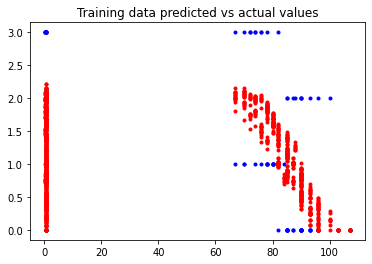

In [ ]:
# use the model to predict the test inputs
predictions = model.predict(X_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=2))
print("actual =\n", y_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(X_test, y_test, 'b.', label='Actual')
plt.plot(X_test, predictions, 'r.', label='Predicted')
plt.show()

y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=Emotion_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, Emotion_mapping.keys())
plt.yticks(np.arange(3) + 0.5, Emotion_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

## Saving the Model

In [ ]:
model.save('model.h5')

In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat emotion_model | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

cat: emotion_model: Is a directory
Header file, model.h, is 35 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


# Port to Arduino
We need to port two pieces of code to Arduino:
1 - the pre-processing pipeline
2 - the classifier

In [ ]:
# """
# Port pipeline to C++
# """
# print(imu_pipeline.to_arduino_file(
#     'sketches/IMUClassify/Pipeline.h', 
#     instance_name='pipeline'
# ))

In [ ]:
"""
Port classifier to C++
"""
# print(imu_classifier.to_arduino_file(
#     'sketches/IMUClassify/Classifier.h', 
#     instance_name='forest', 
#     class_map=imu_dataset.class_map
# ))

'\nPort classifier to C++\n'